In [1]:
import pandas as pd

BIGDATA=pd.read_excel('Pepechum.xlsx',sheet_name='BIGDATA',index_col='Nombre')
GLOBAL=pd.read_excel('Pupeta.xlsx',sheet_name='GLOBAL',index_col='Unnamed: 0').T
Tiempo1=pd.read_excel('Pupeta.xlsx',sheet_name='1TIEMPO',index_col='Unnamed: 0').T
Tiempo2=pd.read_excel('Pupeta.xlsx',sheet_name='2TIEMPO',index_col='Unnamed: 0').T
GLOBAL = GLOBAL[GLOBAL['Regates'].notna()]
Vacios = GLOBAL[ GLOBAL['Posesión de balón'] == ' ' ].index
GLOBAL.drop(Vacios , inplace=True)
Tiempo1 = Tiempo1[Tiempo1['Regates'].notna()]
Vacios = Tiempo1[ Tiempo1['Posesión de balón'] == ' ' ].index
Tiempo1.drop(Vacios , inplace=True)
Tiempo2 = Tiempo2[Tiempo2['Regates'].notna()]
Vacios = Tiempo2[ Tiempo2['Posesión de balón'] == ' ' ].index
Tiempo2.drop(Vacios , inplace=True)
#GLOBAL = GLOBAL[GLOBAL['Posesión de balón']==" "]
#CUCA = GLOBAL[ (GLOBAL['Regates'].notna()) or (GLOBAL['Posesión de balón'] == " ") ].index
#### Agregado de Rival-Resultado-Condicion a BIGDATA
Fixture=pd.read_excel('Pumpet.xlsx')
ContadorFixture=0
inicio=0
BIGDATA['Resultado']=""
BIGDATA['Rival']=''
BIGDATA['Condicion']=''
BIGDATA['Local']=''
BIGDATA['Visitante']=''
BIGDATA['Partido']=''
for i in range(0,len(BIGDATA.index)):
    if BIGDATA['Equipo'].iloc[i]==Fixture['Local'][ContadorFixture]:
        BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
        BIGDATA['Condicion'][i]='Home'
        BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
        BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
        BIGDATA['Partido'][i]=BIGDATA['Equipo'][i]+'-'+BIGDATA['Rival'][i]
    elif BIGDATA['Equipo'].iloc[i]==Fixture['Visitante'][ContadorFixture]:
        BIGDATA['Rival'][i]=Fixture['Local'][ContadorFixture]
        BIGDATA['Condicion'][i]='Away'
        BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
        BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
        BIGDATA['Partido'][i]=BIGDATA['Rival'][i]+'-'+BIGDATA['Equipo'][i]
    else:
        for a in range(inicio,i):
            BIGDATA['Resultado'][a]=Fixture['Resultado'][ContadorFixture]      
        inicio=i
        ContadorFixture=ContadorFixture+1
        if BIGDATA['Equipo'].iloc[i]==Fixture['Local'][ContadorFixture]:
            BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
            BIGDATA['Condicion'][i]='Home'
            BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
            BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
            BIGDATA['Partido'][i]=BIGDATA['Equipo'][i]+'-'+BIGDATA['Rival'][i]   
        else:
            BIGDATA['Rival'][i]=Fixture['Local'][ContadorFixture]
            BIGDATA['Condicion'][i]='Away'
            BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
            BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
            BIGDATA['Partido'][i]=BIGDATA['Rival'][i]+'-'+BIGDATA['Equipo'][i]
for a in range(inicio,i+1):
    BIGDATA['Resultado'][a]=BIGDATA['Resultado'][a]=Fixture['Resultado'][ContadorFixture]   
####
#BIGDATA['GolesyAsistencias']=BIGDATA['Goles']+BIGDATA['Asistencias']
BIGDATA.insert(loc = 4, column = 'Goles y Asistencias', value = BIGDATA['Goles']+BIGDATA['Asistencias'])
### Numerizando GLOBAL
GLOBAL['Posesión de balón']=GLOBAL['Posesión de balón'].astype('float64')*100
GLOBAL[['Tiros totales', 'Tiros a puerta', 'Tiros fuera','Disparos bloqueados', 'Saques de esquina', 'Fueras de juego',
        'Faltas','Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras','Ocasiones claras falladas', 'Disparos al Palo',
        'Contraataques','Tiros en contraataque', 'Goles en contraataque','Tiros dentro del área',
        'Tiros desde fuera del área', 'Paradas','Pases', 'Pases totales', 'Porc. Pases efectivos','Pases largos efectivos',
        'Pases largos totales','Porc. Pases largos efectivos', 'Centros completados','Centros intentados',
        'Porc. Centros completados','Regates completados', 'Regates intentados', 'Porc. Regates efectivos','Posesión perdida',
        'Duelos ganados', 'Balones aéreos ganados','Entradas', 'Intercepciones', 'Despejes']]=GLOBAL[['Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas','Tarjetas amarillas', 'Tarjetas rojas','Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al Palo', 'Contraataques','Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas','Pases', 'Pases totales', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales','Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados','Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados','Entradas', 'Intercepciones', 'Despejes']].astype('int64')
####
pd.options.display.max_columns = None

<ipython-input-1-e7ed2dbf2217>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
<ipython-input-1-e7ed2dbf2217>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BIGDATA['Condicion'][i]='Home'
<ipython-input-1-e7ed2dbf2217>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
<ipython-input-1-e7ed2dbf2217>:33: SettingWithCopyWarning

In [2]:
BIGDATA['Porc Efectividad pases']=BIGDATA['Porc Efectividad pases']*(BIGDATA['Minutos jugados']/90)
listas=['Goles','Asistencias','Entradas','Goles y Asistencias','Pases acertados','Pases totales','Porc Efectividad pases',
        'Duelos ganados','Duelos en el suelo ganados','Duelos aereos ganados','Tiros a puerta','Tiros fuera',
        'Regates completados','Despejes','Disparos Bloq Def','Intercepciones','Regateado','Pases clave','Posesion perdida',
        'Faltas','Recibió falta','Fueras de juego']
lis=[1.02,0.52,5.63,1.36,68.38,76.92,0.9,11.66,9.15,5.88,1.92,1.78,5.07,5.54,0.82,2.9,2.93,3.01,24.24,3.46,4.37,1.23]

c=BIGDATA.max()
for k,o in zip(listas,lis):
    c[k]=o
c

Equipo                                         Velez Sarsfield
Goles                                                     1.02
Asistencias                                               0.52
Entradas                                                  5.63
Goles y Asistencias                                       1.36
Pases acertados                                          68.38
Pases totales                                            76.92
Porc Efectividad pases                                     0.9
Duelos efectuados                                           30
Duelos ganados                                           11.66
Duelos en el suelo efectuados                               27
Duelos en el suelo ganados                                9.15
Duelos aéreos efectuados                                    17
Duelos aereos ganados                                     5.88
Minutos jugados                                             90
Posicion                                               

In [3]:
lista=['Goles','Asistencias','Entradas','Goles y Asistencias','Pases acertados','Pases totales','Porc Efectividad pases',
       'Duelos efectuados','Duelos ganados','Duelos en el suelo efectuados','Duelos en el suelo ganados',
       'Duelos aéreos efectuados','Duelos aereos ganados','Tiros a puerta','Tiros fuera','Disparos bloq ATA',
       'Regates intentados','Regates completados','Despejes','Disparos Bloq Def','Intercepciones','Entradas.1',
       'Regateado','Toques','Pases clave','Centros intentados','Centros completados','Balones largos intentados',
       'Balones largos completados','Posesion perdida','Faltas','Recibió falta','Fueras de juego']
BIG=BIGDATA.groupby('Nombre').sum()
for a in lista:
    BIG[a]=(BIG[a]/c[a])/(BIG['Minutos jugados']/90)
BIG.sort_values(by='Nombre')

Goles  Asistencias  Entradas  Goles y Asistencias  \
Nombre                                                               
Aaron Molinas      0.0     1.680358  0.620807             0.642490   
Abel Bustos        0.0     0.000000  3.552398             0.000000   
Adam Bareiro       0.0     0.000000  0.235085             0.000000   
Adonis Frías       0.0     0.000000  0.133215             0.000000   
Agustin Rossi      0.0     0.000000  0.000000             0.000000   
...                ...          ...       ...                  ...   
Yeison Gordillo    0.0     0.000000  1.012675             0.000000   
Yonatan Cabral     0.0     0.000000  0.000000             0.000000   
Ángel González     0.0     0.000000  0.000000             0.000000   
Ángelo Martino     0.0     0.000000  0.000000             0.000000   
‪Ignacio Schor     0.0     1.291619  0.238594             0.493854   

                 Pases acertados  Pases totales  Porc Efectividad pases  \
Nombre                                                                    
Aaron Molinas           0.600584       0.658861                0.921143   
Abel Bustos             0.146242       0.130005                1.111111   
Adam Bareiro            0.180651       0.326925                0.537200   
Adonis Frías            0.932290       0.910036                1.011111   
Agustin Rossi           0.248611       0.393266                0.625000   
...                          ...            ...                     ...   
Yeison Gordillo         0.321599       0.450018                0.702916   
Yonatan Cabral          0.741742       0.748632                0.965631   
Ángel González          0.415634       0.422273                0.959733   
Ángelo Martino          0.159098       0.244295                0.670330   
‪Ignacio Schor          0.230822       0.279414                0.816045   

                 Duelos efectuados  Duelos ganados  \
Nombre                                               
Aaron Molinas             0.611650        0.899266   
Abel Bustos               0.666667        1.715266   
Adam Bareiro              0.705882        0.718898   
Adonis Frías              0.358333        0.578902   
Agustin Rossi             0.008333        0.000000   
...                            ...             ...   
Yeison Gordillo           0.556561        0.698525   
Yonatan Cabral            0.139831        0.163532   
Ángel González            0.338346        0.290177   
Ángelo Martino            0.428571        0.254463   
‪Ignacio Schor            0.492537        0.633624   

                 Duelos en el suelo efectuados  Duelos en el suelo ganados  \
Nombre                                                                       
Aaron Molinas                         0.517799                    0.763966   
Abel Bustos                           0.740741                    2.185792   
Adam Bareiro                          0.392157                    0.385728   
Adonis Frías                          0.231481                    0.409836   
Agustin Rossi                         0.009259                    0.000000   
...                                        ...                         ...   
Yeison Gordillo                       0.437406                    0.712113   
Yonatan Cabral                        0.028249                    0.000000   
Ángel González                        0.300752                    0.369777   
Ángelo Martino                        0.366300                    0.324266   
‪Ignacio Schor                        0.435323                    0.734035   

                 Duelos aéreos efectuados  Duelos aereos ganados  \
Nombre                                                             
Aaron Molinas                    0.256996               0.594413   
Abel Bustos                      0.000000               0.000000   
Adam Bareiro                     0.622837               0.825330   
Adonis Frías                     0.264706               0.510204   
Agus

In [4]:

lista=['Goles y Asistencias','Pases totales','Porc Efectividad pases','Duelos efectuados','Duelos en el suelo efectuados',
       'Duelos aéreos efectuados','Regates intentados','Balones largos intentados','Centros intentados','Goles',
       'Asistencias','Pases acertados','Duelos ganados','Duelos en el suelo ganados','Centros completados',
       'Balones largos completados','Duelos aereos ganados','Regates completados','Entradas',
       'Tiros a puerta','Disparos bloq ATA','Despejes','Disparos Bloq Def','Intercepciones','Toques',
       'Pases clave','Recibió falta','Regateado','Tiros fuera',
       'Posesion perdida','Faltas','Fueras de juego']
#a=list(BIG.loc[BIG['Nombre']=='Adam Bareiro'].index)
ORDEN=BIG.loc[BIG['Minutos jugados']>BIG['Minutos jugados'].max()*0.4]
#MP=pd.DataFrame(columns=['Nombre','Posicion'])
#indice=0
nombre=[]
posicion=[]
atributo=[]
valor=[]
for m in lista:
    ORDEN=ORDEN.sort_values(by=m,ascending=False)
    for p in range(1,11):
        nombre.append(ORDEN.index[p-1])
        posicion.append(p-1)
        atributo.append(m)
        valor.append(ORDEN[m][p-1])
        #MP['Nombre'][indice]=ORDEN.index[p]
        #MP['Posicion'][indice]=p
        #indice=indice+1
        #print(ORDEN[m].head(20))
        #print(ORDEN.iloc[p])
        print(ORDEN.index[p])
        print(p)       
#d=['Nombre':nombre,'Posicion':posicion]
MP=pd.DataFrame(columns=['Nombre','Posicion','Atributo','Valor'])
MP['Nombre']=nombre
MP['Posicion']=posicion
MP['Atributo']=atributo
MP['Valor']=valor

Agustín Martegani
1
Pablo Argañaraz
2
Francisco Pizzini
3
Juan Quintero
4
Jhonatan Candia
5
Enzo Copetti
6
Darío Benedetto
7
Sebastián Villa
8
Carlos Rotondi
9
Miguel Merentiel
10
Paulo Díaz
1
Christian Javier Báez
2
Kevin Lomonaco
3
Tomás Belmonte
4
Nazareno Colombo
5
Adonis Frías
6
Milton Casco
7
Enzo Pérez
8
Lucas Villalba
9
Jonathan Galván
10
Raúl Loaiza
1
Adonis Frías
2
Juan Ramírez
3
Fausto Vera
4
Facundo Almada
5
Pol Fernández
6
Alan Soñora
7
Federico Lanzillota
8
Agustín Mulet
9
Yonatan Cabral
10
Jonathan Torres
1
Lucas Barrios
2
Adam Bareiro
3
Fernando Valenzuela
4
José López
5
Juan Manuel García
6
Malcom Braida
7
Matías Ramírez
8
Gino Infantino
9
Jonathan Álvez
10
Matías Ramírez
1
Mauro Luna Diale
2
Alexandro Bernabei
3
Juan Ramírez
4
Ivan Gómez
5
Ignacio Fernandez
6
Malcom Braida
7
Pablo Pérez
8
Juan Manuel Vazquez
9
Gino Infantino
10
Juan Manuel García
1
Lucas Barrios
2
Jonathan Álvez
3
Renzo López
4
Adam Bareiro
5
Leandro Díaz
6
José López
7
Paulo Díaz
8
Bruno Sepúlveda
9


In [6]:
#'Regateado','Tiros fuera','Posesion perdida','Faltas','Fueras de juego'
#for i in range(0,180):
#    MP['Valor'][i]=MP['Valor'][i]*0.2
#for i in range(180,360):
#    MP['Valor'][i]=MP['Valor'][i]*0.8
#for i in range(540,len(MP.index)):
#    MP['Valor'][i]=MP['Valor'][i]*-1

#for i in range(0,450):
#    MP['Valor'][i]=MP['Valor'][i]*0.2
#for i in range(450,900):
#    MP['Valor'][i]=MP['Valor'][i]*0.8
#for i in range(1350,len(MP.index)):
#    MP['Valor'][i]=MP['Valor'][i]*-1
for i in range(0,90):
    MP['Valor'][i]=MP['Valor'][i]*0.2
for i in range(90,180):
    MP['Valor'][i]=MP['Valor'][i]*0.8
for i in range(270,len(MP.index)):
    MP['Valor'][i]=MP['Valor'][i]*-1
MP

<ipython-input-6-adf0c80c1f2e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MP['Valor'][i]=MP['Valor'][i]*0.2
<ipython-input-6-adf0c80c1f2e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MP['Valor'][i]=MP['Valor'][i]*0.8
<ipython-input-6-adf0c80c1f2e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MP['Valor'][i]=MP['Valor'][i]*-1


Nombre  Posicion             Atributo     Valor
0        Mauro Boselli         0  Goles y Asistencias  0.049710
1    Agustín Martegani         1  Goles y Asistencias  0.046440
2      Pablo Argañaraz         2  Goles y Asistencias  0.041796
3    Francisco Pizzini         3  Goles y Asistencias  0.041360
4        Juan Quintero         4  Goles y Asistencias  0.036511
..                 ...       ...                  ...       ...
315     Matías Ramírez         5      Fueras de juego -1.026958
316     Gabriel Gudiño         6      Fueras de juego -0.944138
317  Leandro Fernández         7      Fueras de juego -0.839234
318      Mauro Boselli         8      Fueras de juego -0.824459
319    Jonathan Torres         9      Fueras de juego -0.813008

[320 rows x 4 columns]

In [8]:
# ACA ESTA EL LISTADO
Mejores=list(MP.groupby('Nombre').sum().sort_values(by='Valor',ascending=False).head(20).index)

for a in Mejores:
    print(MP.loc[MP['Nombre']==a])

         Nombre  Posicion                    Atributo     Valor
11   Paulo Díaz         1               Pases totales  0.042362
58   Paulo Díaz         8    Duelos aéreos efectuados  0.021762
111  Paulo Díaz         1             Pases acertados  0.632596
122  Paulo Díaz         2              Duelos ganados  0.585767
151  Paulo Díaz         1  Balones largos completados  0.441107
161  Paulo Díaz         1       Duelos aereos ganados  0.851819
241  Paulo Díaz         1                      Toques  0.641483
               Nombre  Posicion        Atributo     Valor
15   Nazareno Colombo         5   Pases totales  0.036790
211  Nazareno Colombo         1        Despejes  1.163856
237  Nazareno Colombo         7  Intercepciones  0.988163
243  Nazareno Colombo         3          Toques  0.590164
               Nombre  Posicion           Atributo     Valor
222  Nicolás Ferreyra         2  Disparos Bloq Def  1.626016
233  Nicolás Ferreyra         3     Intercepciones  1.103448
               

In [7]:
#columnas
#print(GLOBAL.columns)
#print(BIGDATA.columns)
BIGDATA.tail(50)
MP.groupby('Nombre').sum().sort_values(by='Valor',ascending=False).head(20)

Posicion     Valor
Nombre                                   
Paulo Díaz                   15  3.216896
Nazareno Colombo             16  2.778972
Nicolás Ferreyra              5  2.729465
Christian Javier Báez        21  2.625144
Gianluca Ferrari             22  2.617067
Enzo Roldán                  17  2.412600
Lucas Beltrán                14  2.173598
Sergio Barreto                0  2.090592
Leandro Díaz                 18  2.058568
Cristián Zapata              10  2.049837
Matías Pérez                 24  1.871387
Juan Manuel García           18  1.808799
Brahian Alemán               23  1.801777
Haibrany Ruiz Diaz            1  1.707317
Fernando Juarez               9  1.633122
Lucas Suarez                  3  1.558666
Francisco Ortega             20  1.515206
Jonathan Torres              20  1.493476
Davíd Martínez                0  1.413299
Francisco Grahl               4  1.401142

Ingrese el parámetro a analizarDespejes
transData(0,0) = [144.  81.]


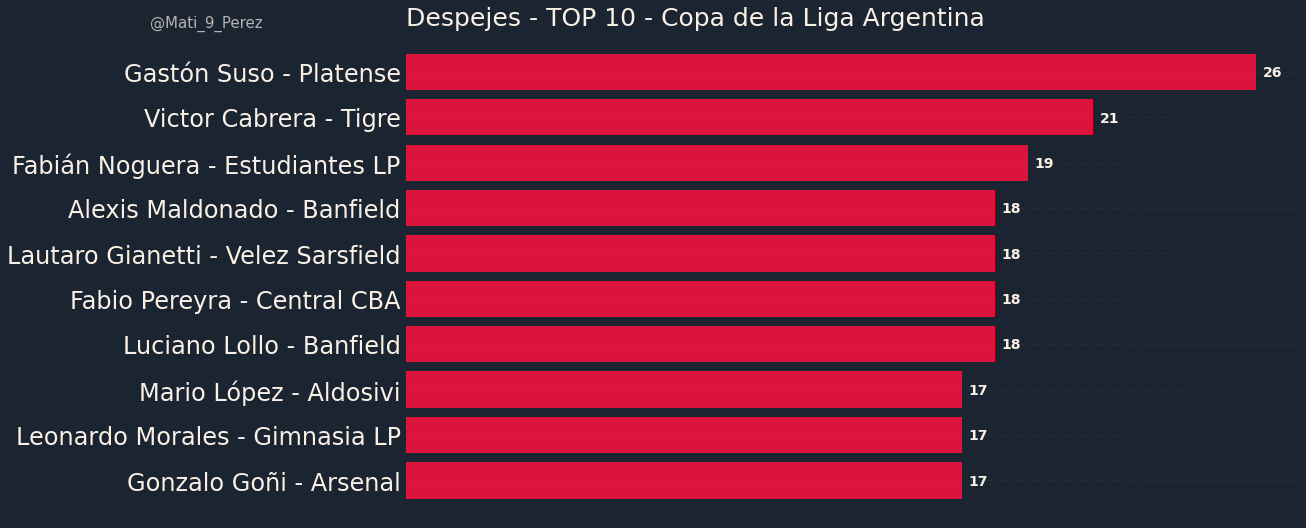

In [8]:
#Analisis de Jugadores
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as image
#function to scale the image to desires length and with
parametro=input('Ingrese el parámetro a analizar')
#nombre=BIGDATA.sort_values(by=[parametro],ascending= False).head(10).index
nombre=BIGDATA.groupby(['Nombre']).sum().sort_values(by=parametro,ascending=False).head(10).index
#equipo=BIGDATA.sort_values(by=[parametro],ascending= False)['Equipo'].head(10)
#dicc = BIGDATA.groupby("Nombre")["Equipo"].sort_values(by='Pases acertados',ascending=False).head(10).unique().apply(list).to_dict()
equipo=[]
dicc = BIGDATA.groupby("Nombre")["Equipo"].unique().apply(list).to_dict()
for i in nombre:
    equipo.append(str(dicc[i])[2:-2])
abscisa=nombre+" - "+equipo
#abscisa=nombre+" ("+equipo+")"
cantidad=BIGDATA.groupby(['Nombre']).sum().sort_values(by=parametro,ascending=False)[parametro].head(10)
#cantidad = BIGDATA.sort_values(by=[parametro],ascending= False)[parametro].head(10)
#imput=input()
#beto=imput+".png"
def scale(im, nR, nC):
    """
    parameters
    im :image
    nR:row size
    nC:column size 
    Return: scaled image 
    """
    number_rows = len(im)     # source number of rows 
    number_columns = len(im[0])  # source number of columns 
    return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  
                 for c in range(nC)] for r in range(nR)]
def watermark(ax,x0,y0):
    """
    adds image logo and positions it on the plot
    ax: figure object 
    x0: adds x 
    y0: adds y 
    """
    img = plt.imread('Copita.png')
    #scale Image
    img =scale(img, 800, 800)

    
    print('transData(0,0) = {}'.format(ax.transData.transform((0,0))))
    ax.figure.figimage(img, x0,y0, alpha=.65, zorder=1,origin="upper")

#name = BIGDATA.sort_values(by=['Pases acertados'],ascending= False).head(12).index
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
watermark(ax,4100,50)
ax.barh(abscisa, cantidad,0.8,color="crimson")
fig.patch.set_facecolor('xkcd:dark')
ax.set_facecolor('xkcd:dark')
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
#ax.xaxis.set_tick_params(pad = 5,colors='linen')
ax.yaxis.set_tick_params(pad = 2,colors='linen',labelsize=16)
ax.axes.get_xaxis().set_visible(False)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 14, fontweight ='bold',
             color ='linen')
#ax.tick_params(axis='x', colors='red')
#ax.tick_params(axis='y', colors='red') 
# Add Plot Title
ax.set_title(parametro+' - TOP 10 - Copa de la Liga Argentina',
             loc ='left', color='linen',fontsize = 25)
 
# Add Text watermark
fig.text(0, 0.88, '@Mati_9_Perez', fontsize = 15,
         color ='linen', ha ='right', va ='bottom',
         alpha = 0.7)

# Show Plot
plt.show()
fig.savefig('jugadoress.png', dpi = 300,bbox_inches="tight")

In [96]:
# Analisis de equipos GLOBAL
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as image
#function to scale the image to desires length and with
print(GLOBAL.columns)
parametro=input('Ingrese el parámetro a analizar')
equipo=GLOBAL.sort_values(by=[parametro],ascending= False).head(10).index

dato=GLOBAL.sort_values(by=[parametro],ascending= False)[parametro].head(10)
abscisa=equipo
cantidad = GLOBAL.sort_values(by=[parametro],ascending= False)[parametro].head(10)*100
#imput=input()
#beto=imput+".png"
def scale(im, nR, nC):
    """
    parameters
    im :image
    nR:row size
    nC:column size 
    Return: scaled image 
    """
    number_rows = len(im)     # source number of rows 
    number_columns = len(im[0])  # source number of columns 
    return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  
                 for c in range(nC)] for r in range(nR)]
def watermark(ax,x0,y0):
    """
    adds image logo and positions it on the plot
    ax: figure object 
    x0: adds x 
    y0: adds y 
    """
    img = plt.imread('Copita.png')
    #scale Image
    img =scale(img, 800, 800)

    
    print('transData(0,0) = {}'.format(ax.transData.transform((0,0))))
    ax.figure.figimage(img, x0,y0, alpha=.65, zorder=1,origin="upper")

#name = BIGDATA.sort_values(by=['Pases acertados'],ascending= False).head(12).index 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
watermark(ax,3600,350)
ax.barh(abscisa, cantidad, color="crimson")

fig.patch.set_facecolor('xkcd:dark')
ax.set_facecolor('xkcd:dark')
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
#ax.xaxis.set_tick_params(pad = 5,colors='linen')
ax.yaxis.set_tick_params(pad = 10,colors='linen',labelsize=16)
ax.axes.get_xaxis().set_visible(False)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 16, fontweight ='bold',
             color ='linen')
#ax.tick_params(axis='x', colors='red')
#ax.tick_params(axis='y', colors='red') 
# Add Plot Title
ax.set_title(parametro+' - Copa de la Liga Argentina',
             loc ='left', color='linen',fontsize = 25)
 
# Add Text watermark
fig.text(0.88, 0.13, '@Mati_9_Perez', fontsize = 15,
         color ='linen', ha ='right', va ='bottom',
         alpha = 0.7)

# Show Plot
plt.show()
#fig.savefig('myimage.svg', format='svg', dpi=1200)
#plt.savefig('destination_path.eps', format='eps')
fig.savefig('plot_name300.png', dpi = 300,bbox_inches="tight")
#fig.savefig('plot_name1200.png', dpi = 1200)

Index(['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al Palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases', 'Pases acierte', 'Pases totales', 'Porc. Pases efectivos',
       'Pases largos', 'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados', 'Regates',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes'],
      dtype='object')


KeyboardInterrupt: Interrupted by user

<ipython-input-94-c633fd884dcc>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


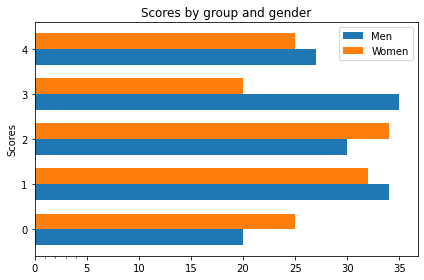

In [94]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, men_means, width, label='Men')
rects2 = ax.barh(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [15]:
#bucle para omitir los que no suman
BIGDATA.columns
for i in BIGDATA.columns:
    if i !="Equipo" and i!='Posicion' and i!='Notas'and i!='Fecha':
        BIGDATA[i]=BIGDATA[i].groupby('Nombre').sum()
        cyq=BIGDATA.groupby('Nombre').sum()
BIGDATA

TypeError: can only concatenate str (not "int") to str

In [1]:
#analisis total del campeonato (MEJORES DEFENSORES CLAVE ESTO) MIRALOOOOOOOOOOOOOOOOOOOOOO
BIGDATA['defpower']=(BIGDATA['Pases acertados']*0.6030/598.59+BIGDATA['Despejes']*0.7446/35.95+BIGDATA['Intercepciones']*0.7046/23.58+BIGDATA['Duelos aereos ganados']*0.64/35.42-BIGDATA['Duelos aéreos efectuados']*0.6861/70.84+BIGDATA['Duelos aereos ganados']*0.64/35.42+BIGDATA['Entradas']*0.6738/36.09+BIGDATA['Disparos Bloq Def']*0.6215/5.5-BIGDATA['Faltas']*0.68615/27.6-BIGDATA['Regateado']*0.6430/21.33)/BIGDATA['Minutos jugados']
#cy=BIGDATA.loc[BIGDATA['Equipo']=='River']
cy=BIGDATA.groupby(['Nombre','Equipo','Posicion']).sum().sort_values(by='defpower',ascending=False)
cy['Porc Efectividad pases']=100*cy['Pases acertados']/cy['Pases totales']
dg=cy.loc[cy['Minutos jugados']>90,['Pases acertados','Despejes','Intercepciones','Duelos efectuados','Duelos ganados','Duelos aereos ganados','Duelos aéreos efectuados','Entradas','Disparos Bloq Def','Faltas','Regateado','Minutos jugados']].head(50)
#+BIGDATA['Pases clave']+BIGDATA['Goles']+BIGDATA['Asistencias']+BIGDATA['Regates completados']+BIGDATA['Recibió falta']
dg

NameError: name 'BIGDATA' is not defined

In [69]:
#diccionario de jugadores
dicc = BIGDATA.groupby("Nombre")["Equipo"].unique().apply(list).to_dict()
equipo = str(dicc['Yonatan Cabral'])[2:-2]
print('Hola me llamo '+equipo)


Hola me llamo Lanús


In [159]:
#borrador no sirve
#new=list(BIGDATA.groupby(['Nombre']).sum().sort_values(by='Pases acertados',ascending=False).head(10).index)
#BIGDATA.groupby("Nombre")["Equipo"].sort_values(by='Pases acertados',ascending=False).head(10).unique().apply(list).to_dict()
#dicc.values()
#dicc = BIGDATA.groupby("Nombre").sort_values(by='Pases acertados',ascending=False).sum()
#unique().apply(list).to_dict()
nombre=list(BIGDATA.groupby(['Nombre']).sum().sort_values(by='Pases acertados',ascending=False).head(10).index)
#nombre=str(nombre)[1:-1]
caca=[]
#hola=dicc.get(nombre)
for i in nombre:
    caca.append(str(dicc[i])[2:-2])
nombre , caca

(['Davíd Martínez',
  'Tomás Belmonte',
  'Paulo Díaz',
  'Facundo Pérez',
  'Lucas Villalba',
  'Enzo Pérez',
  'Miguel Torren',
  'Adonis Frías',
  'Matías Pérez',
  'Christian Javier Báez'],
 ['River',
  'Lanús',
  'River',
  'Lanús',
  'Argentinos Jrs',
  'River',
  'Argentinos Jrs',
  'Def. y Justicia',
  'Lanús',
  'Rosario Ctral.'])

hola
transData(0,0) = [144.  81.]


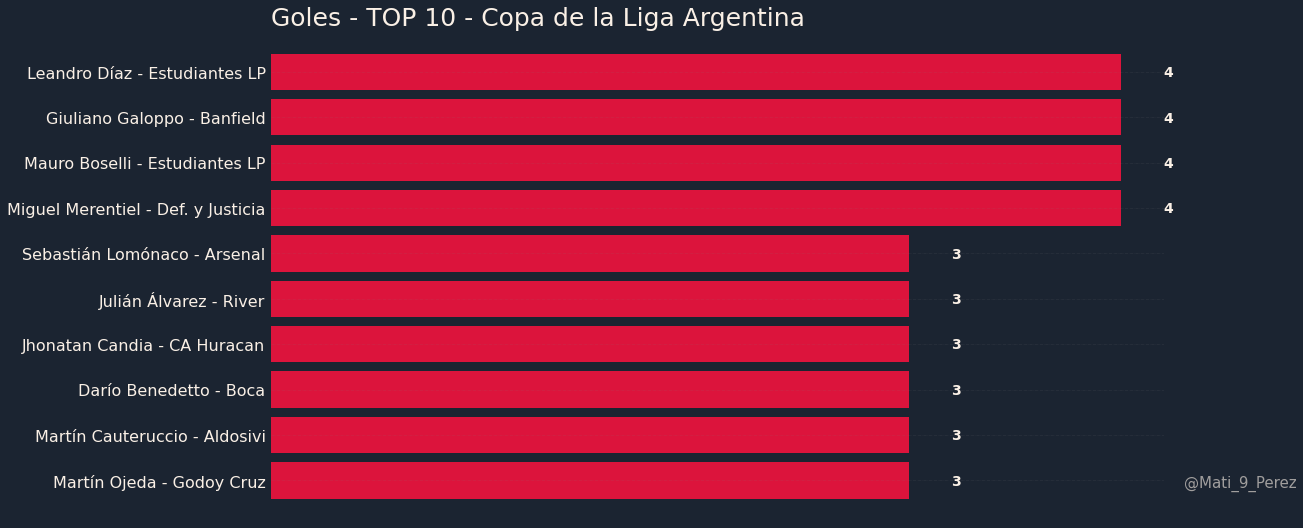

transData(0,0) = [144.  81.]


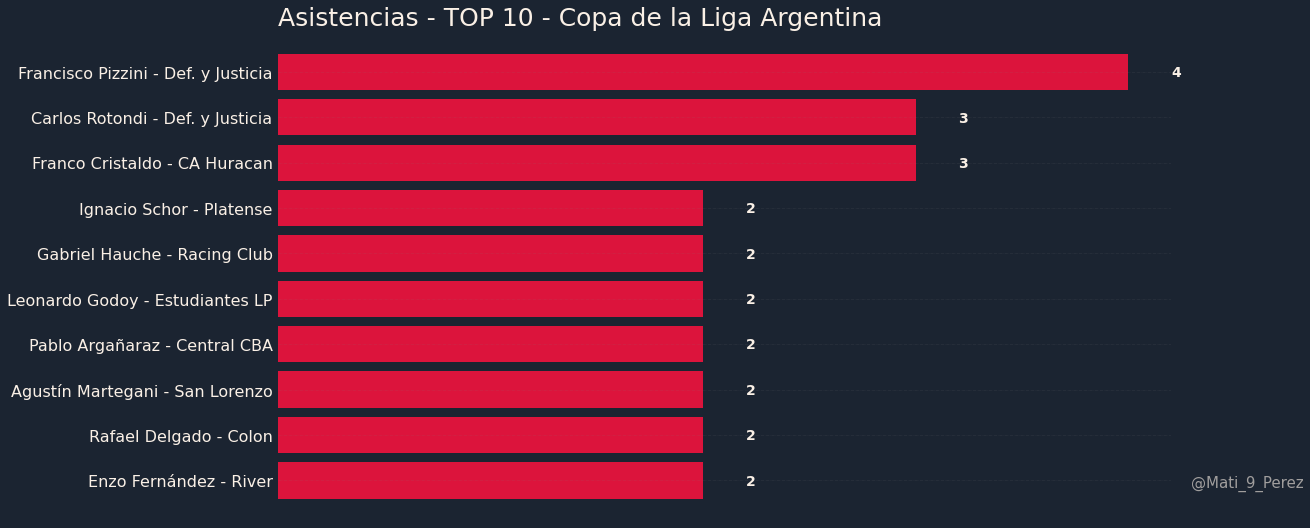

transData(0,0) = [144.  81.]


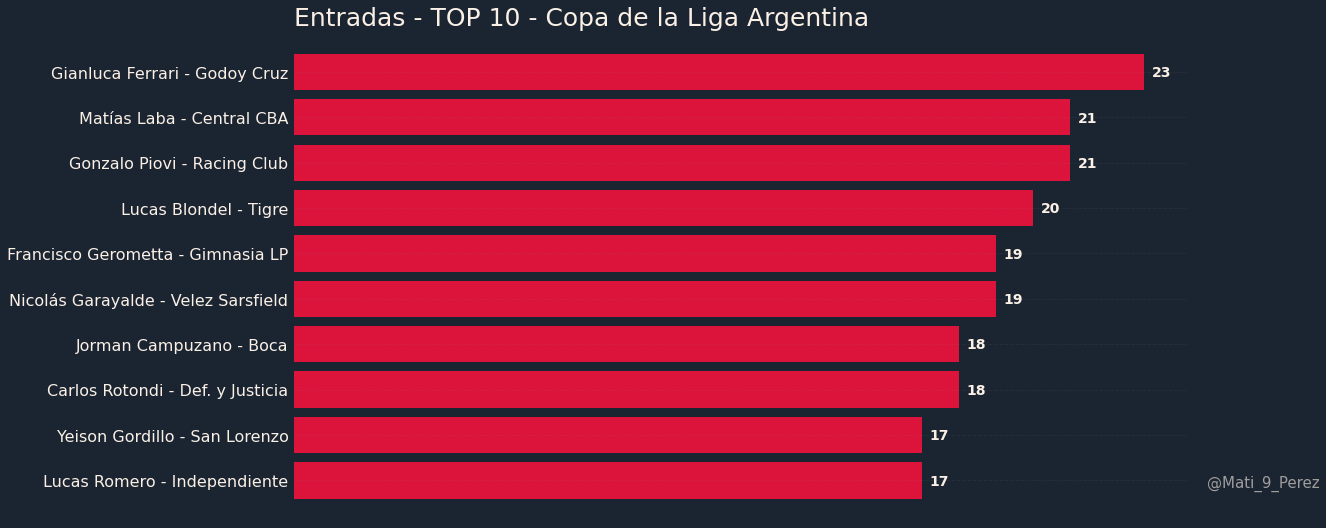

transData(0,0) = [144.  81.]


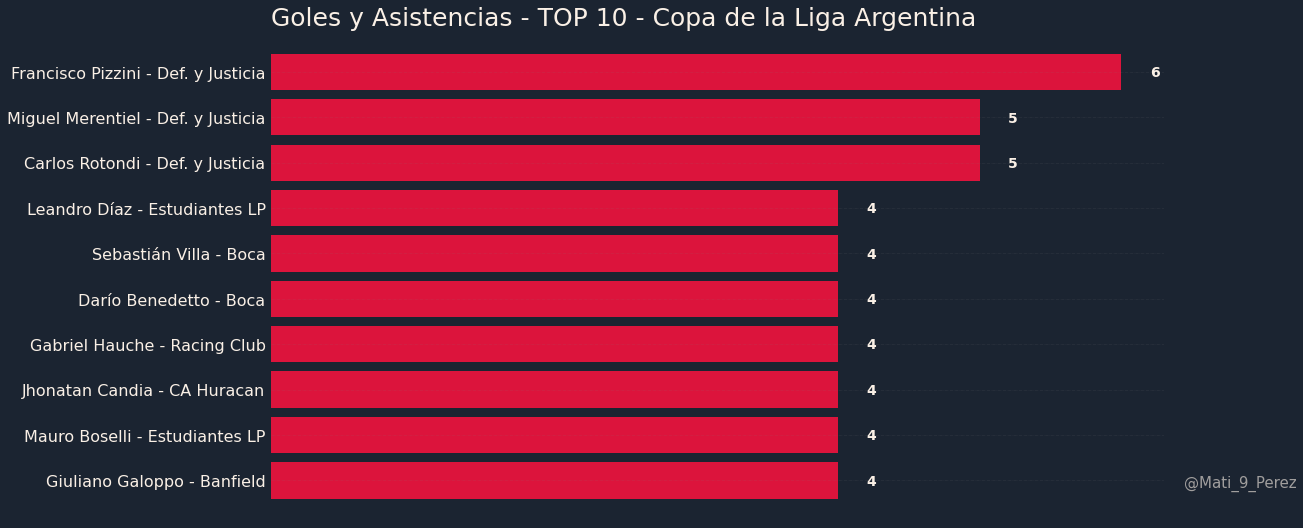

transData(0,0) = [144.  81.]


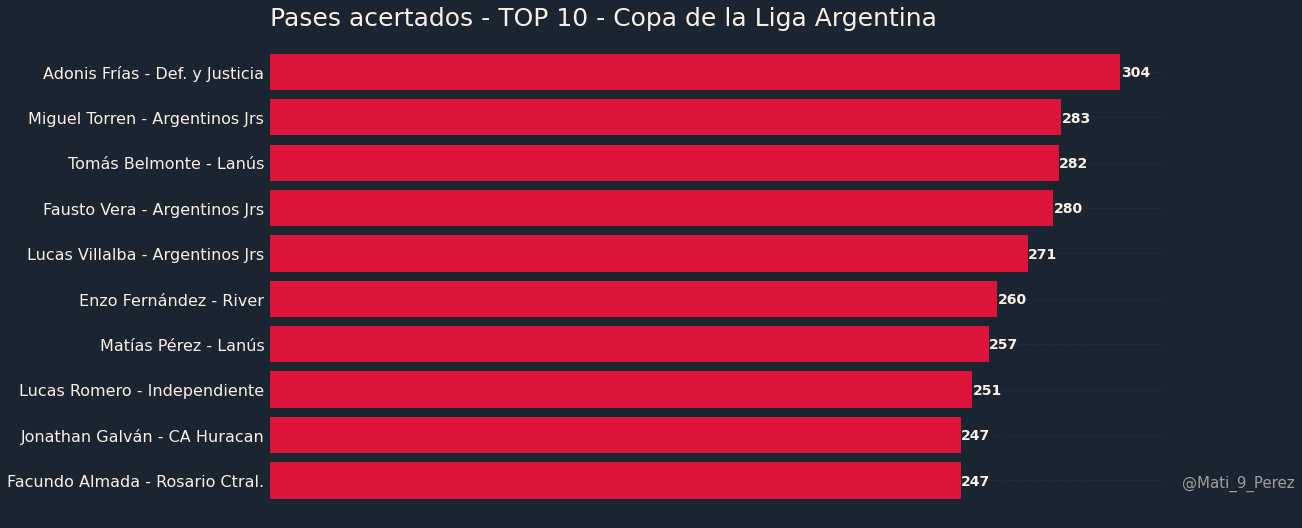

transData(0,0) = [144.  81.]


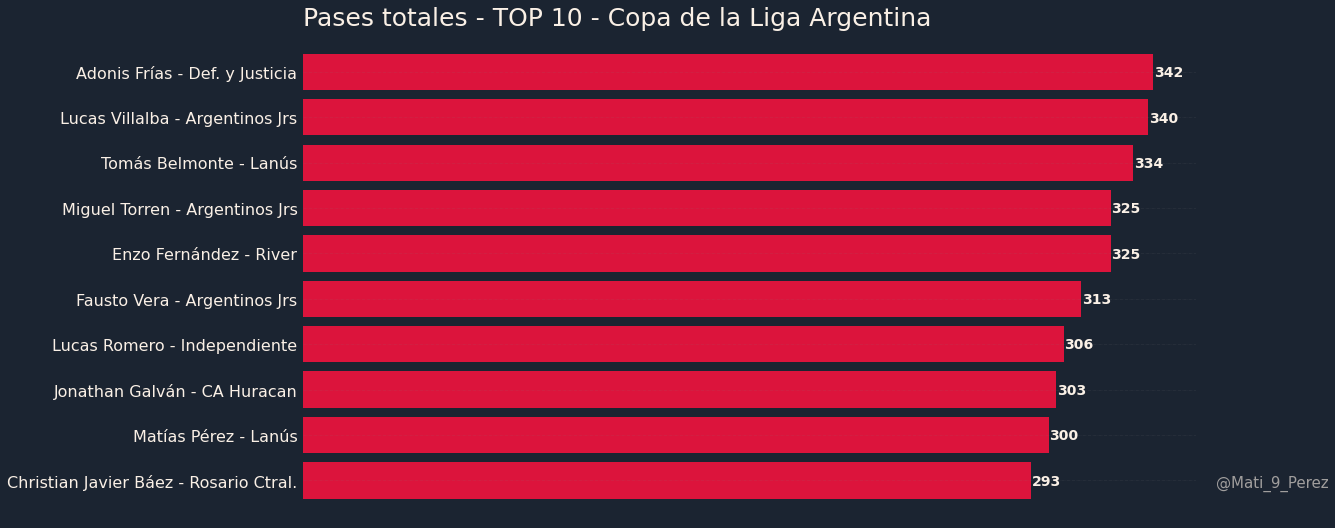

transData(0,0) = [144.  81.]


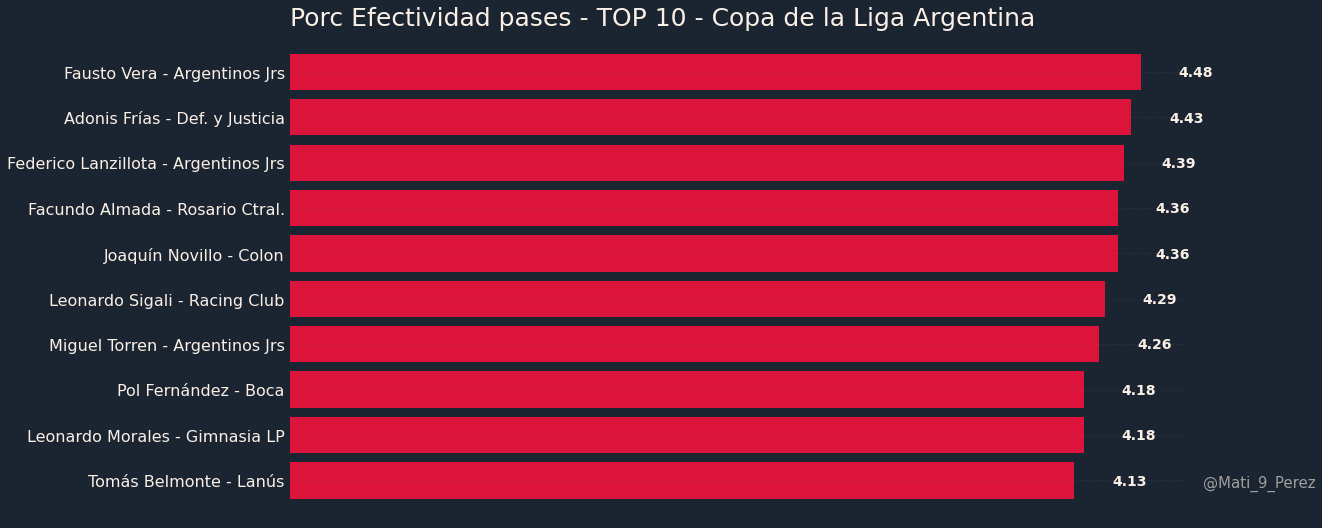

transData(0,0) = [144.  81.]


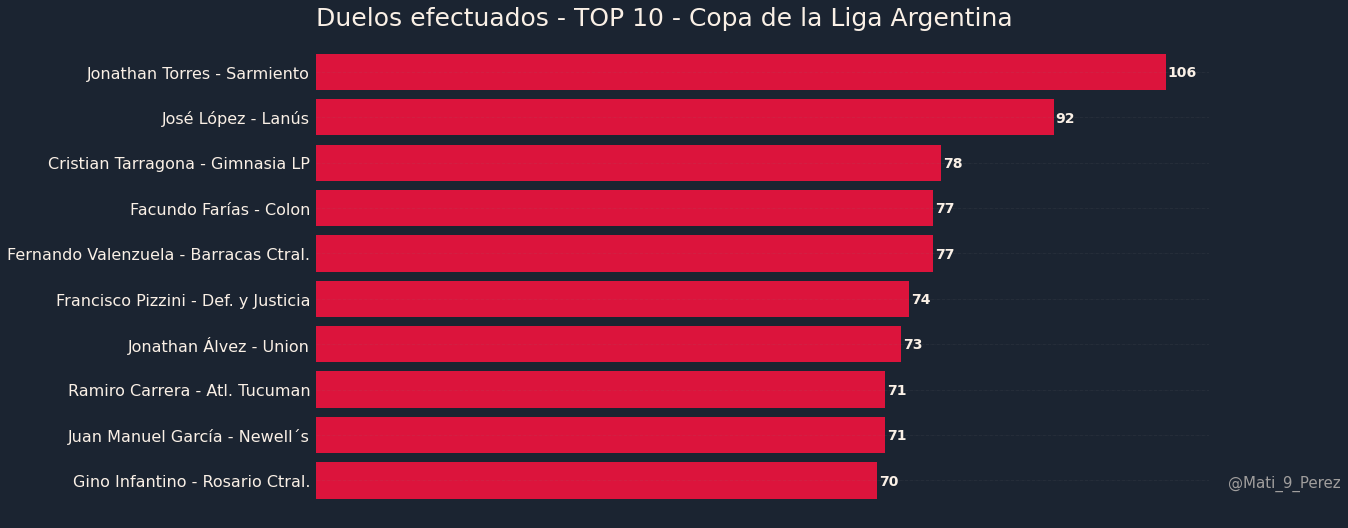

transData(0,0) = [144.  81.]


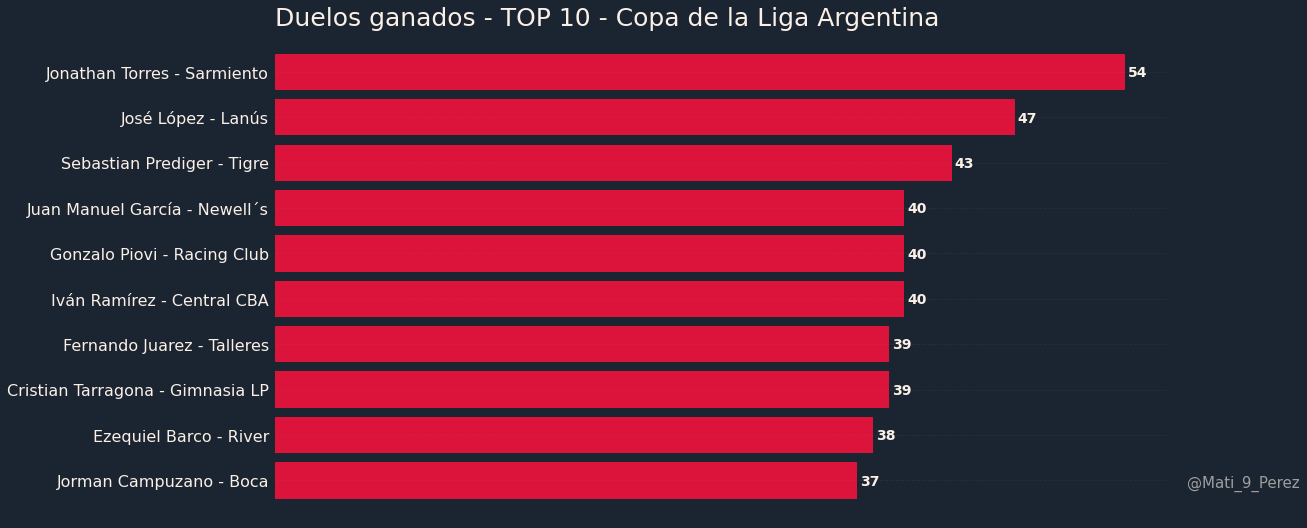

transData(0,0) = [144.  81.]


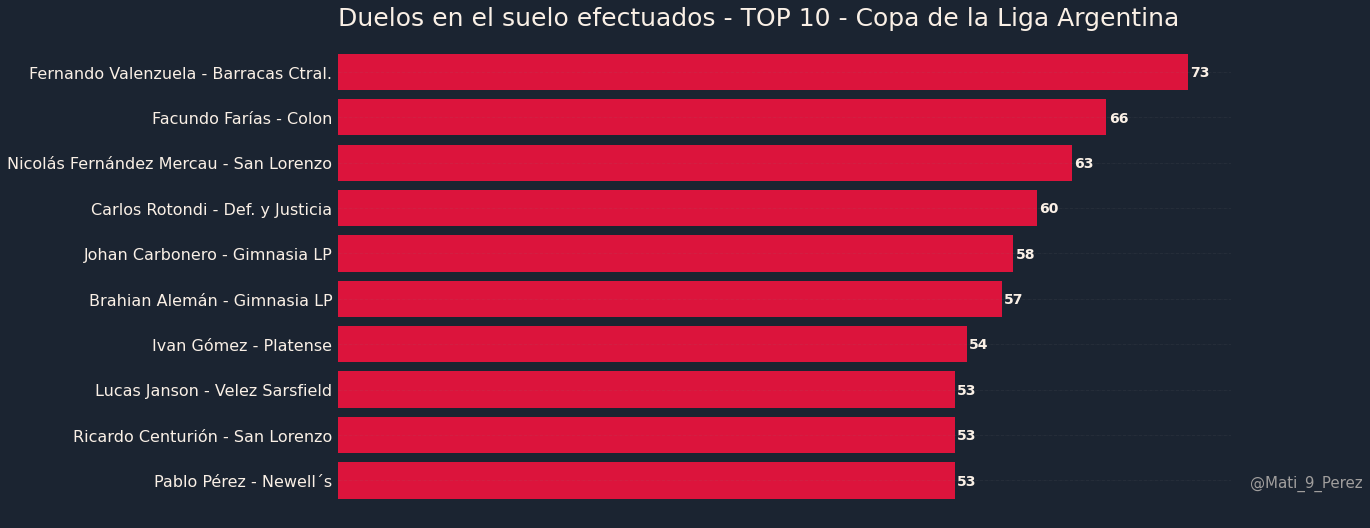

transData(0,0) = [144.  81.]


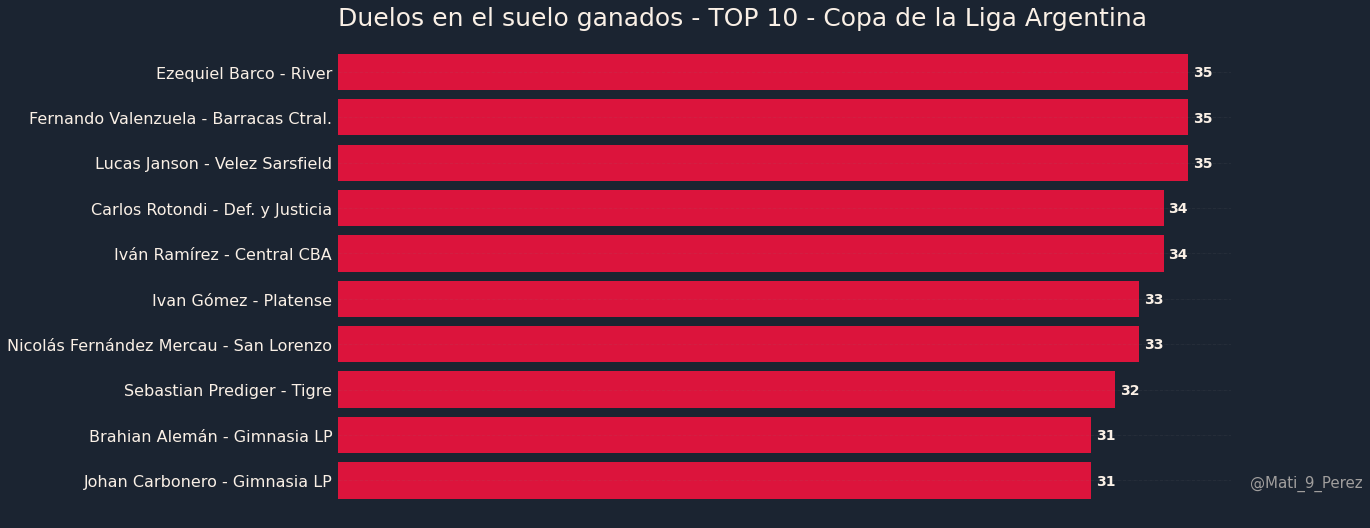

transData(0,0) = [144.  81.]


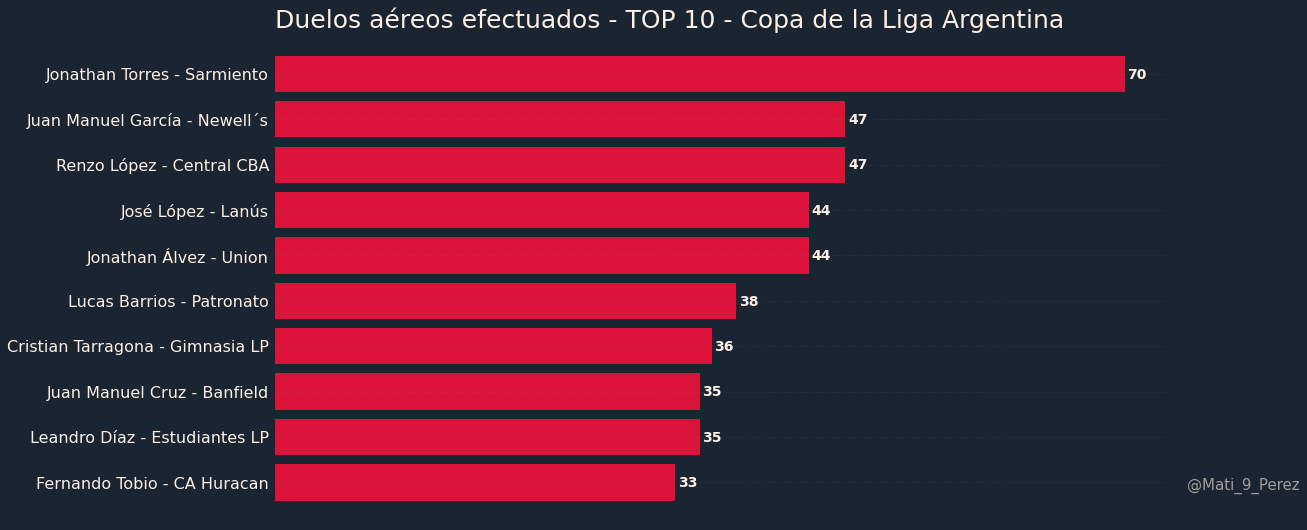

transData(0,0) = [144.  81.]


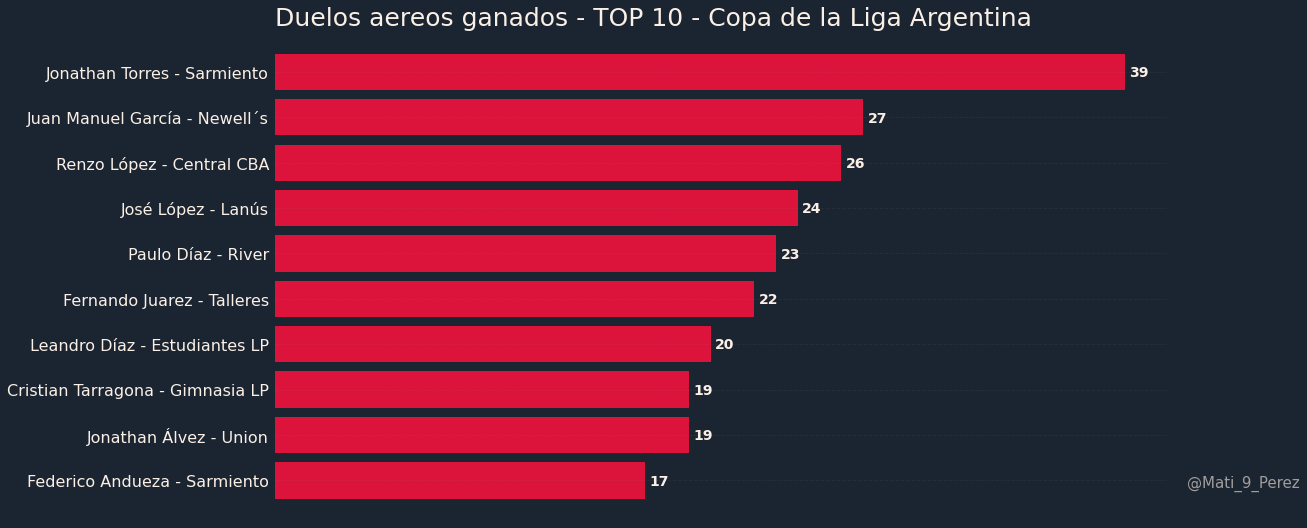

transData(0,0) = [144.  81.]


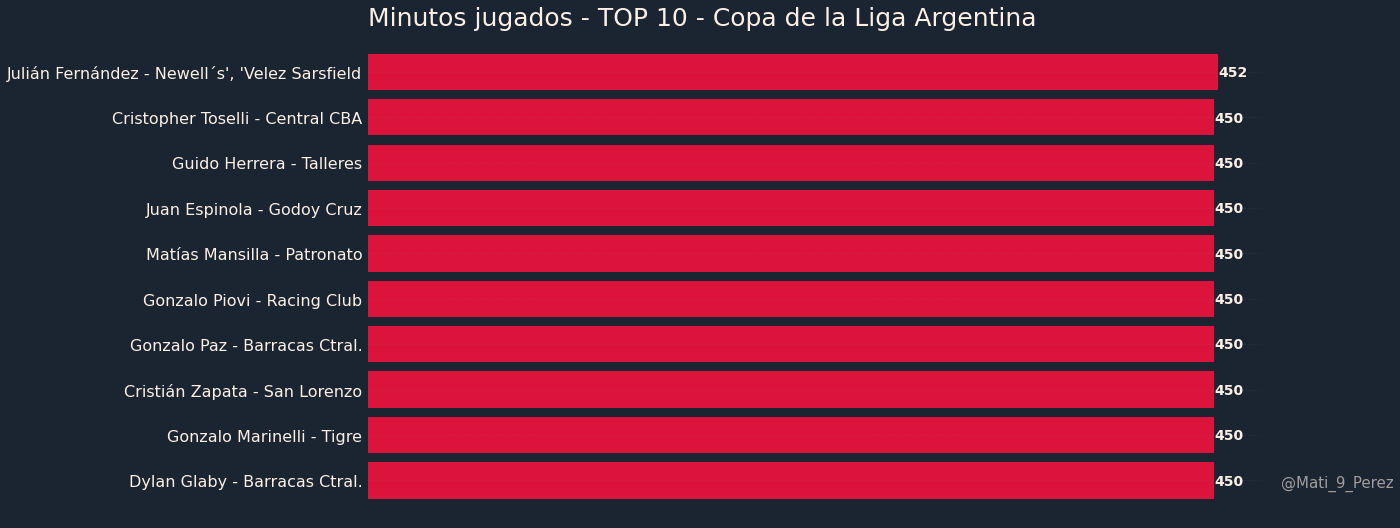

hola
transData(0,0) = [144.  81.]


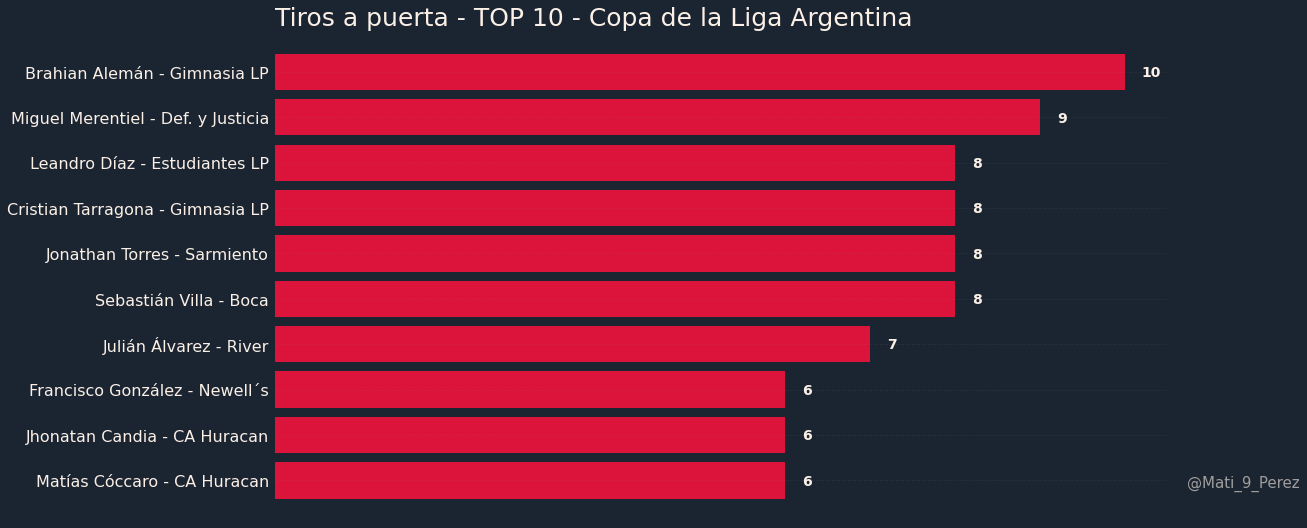

transData(0,0) = [144.  81.]


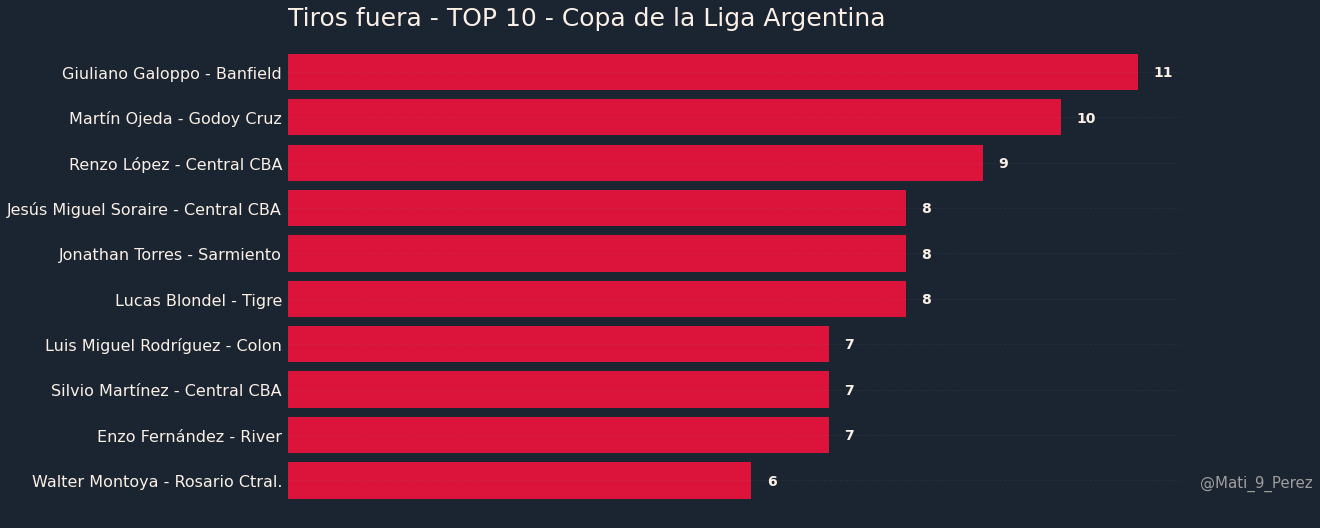

transData(0,0) = [144.  81.]


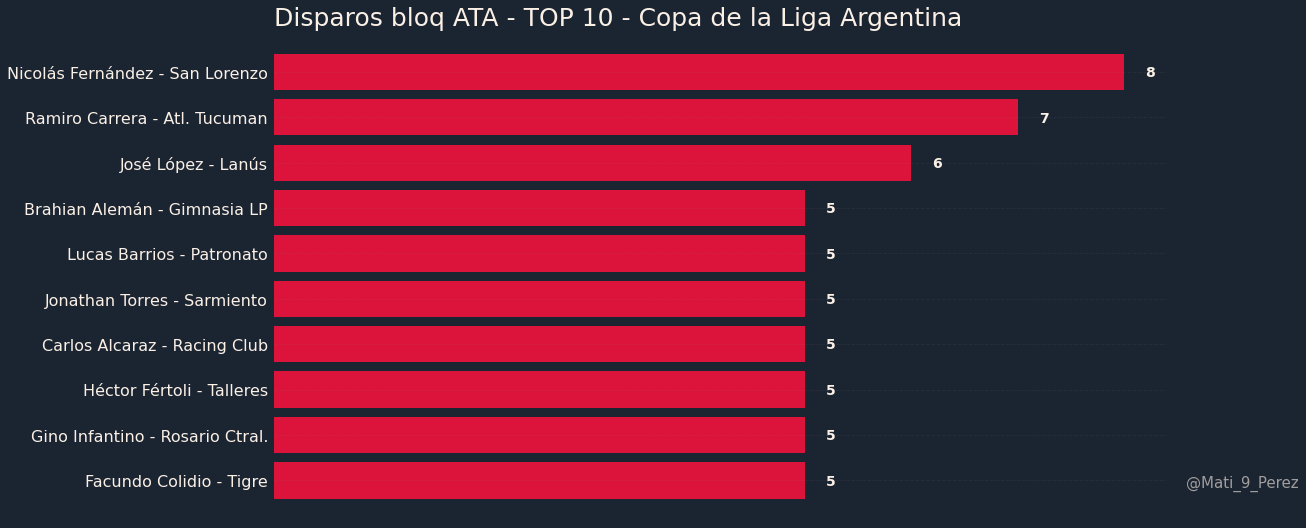

transData(0,0) = [144.  81.]


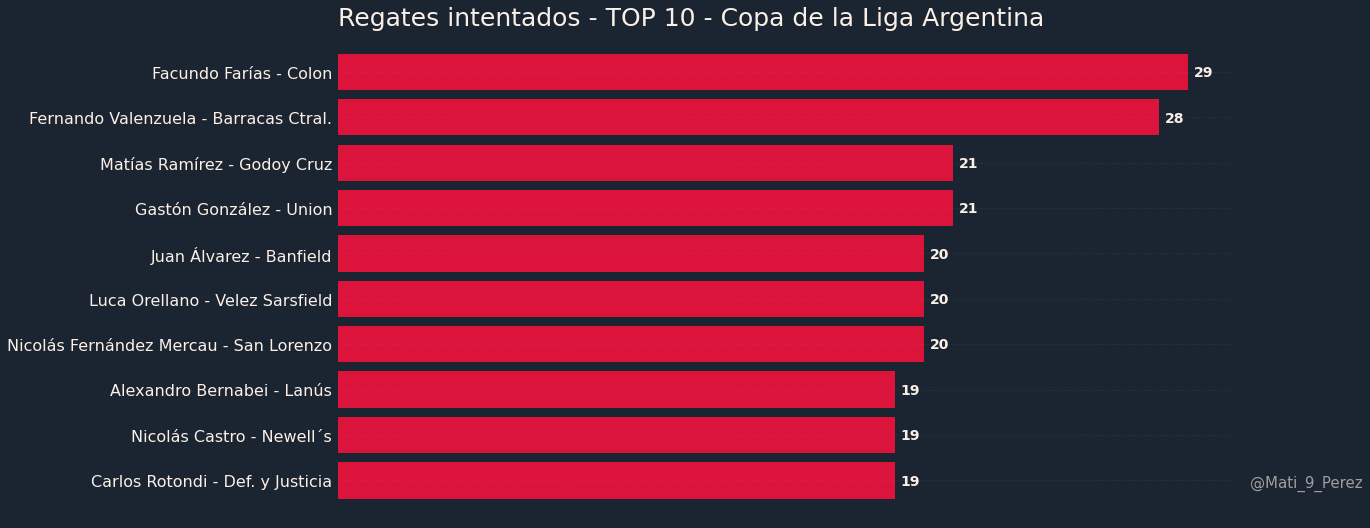

transData(0,0) = [144.  81.]


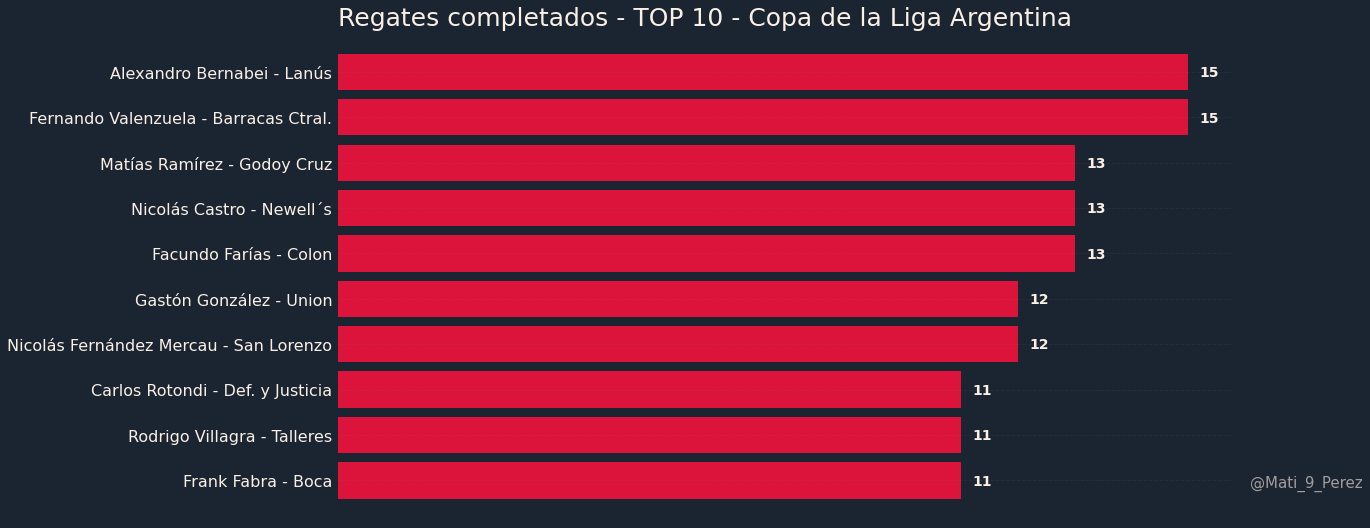

transData(0,0) = [144.  81.]


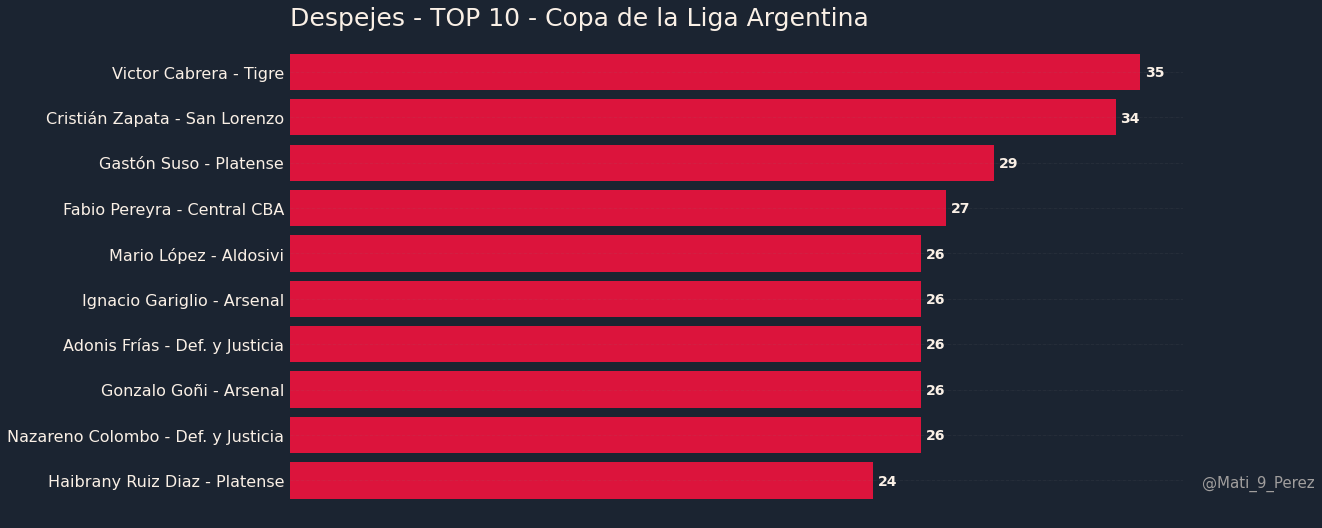

transData(0,0) = [144.  81.]


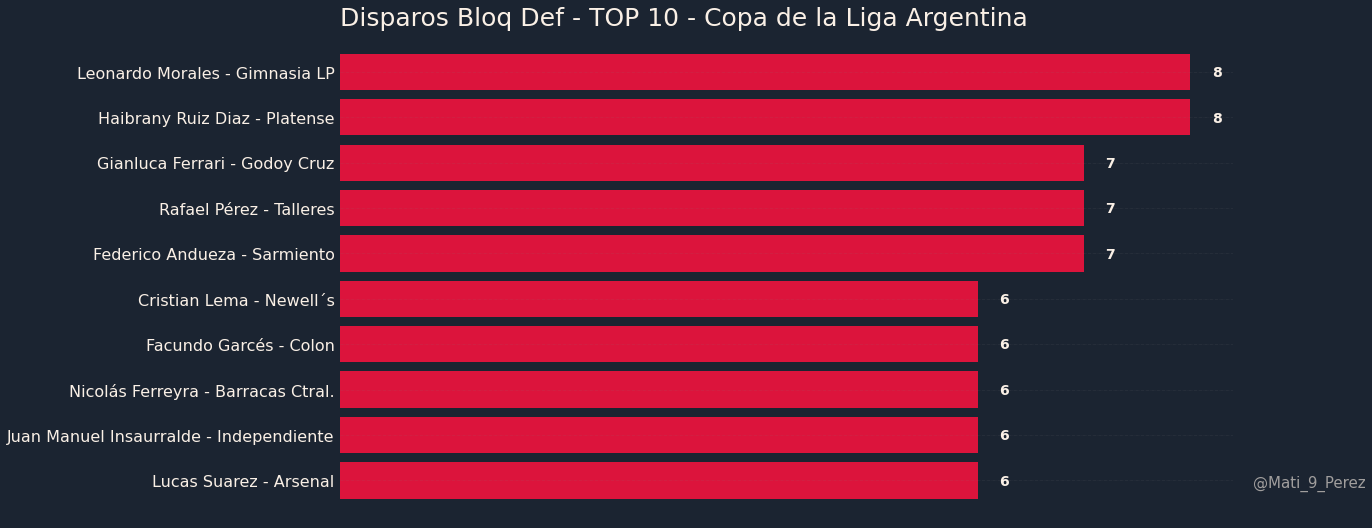

transData(0,0) = [144.  81.]


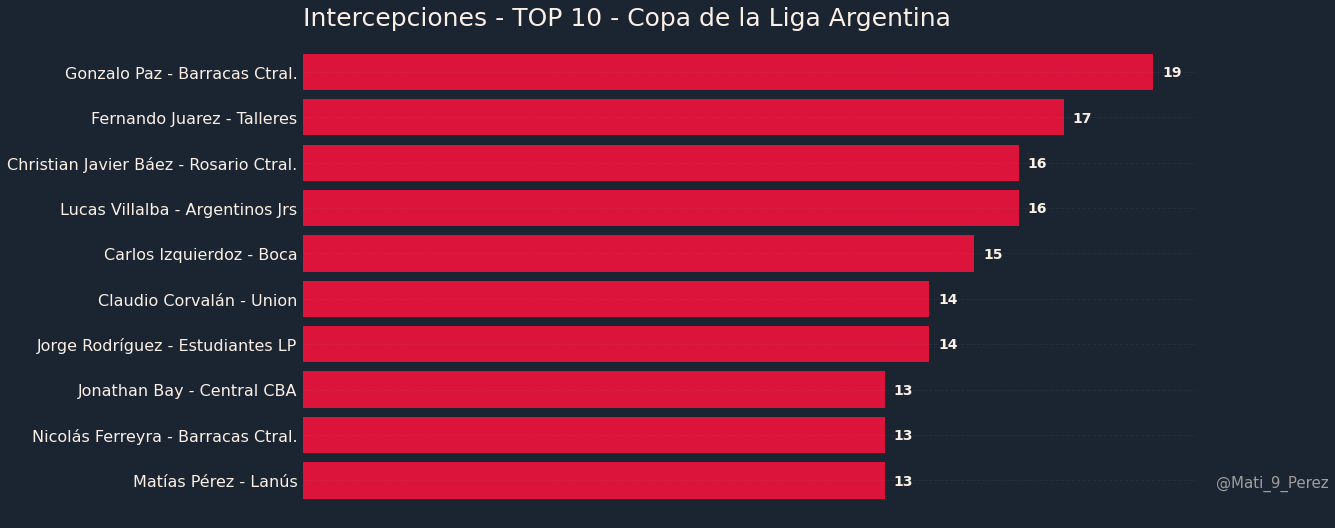

transData(0,0) = [144.  81.]


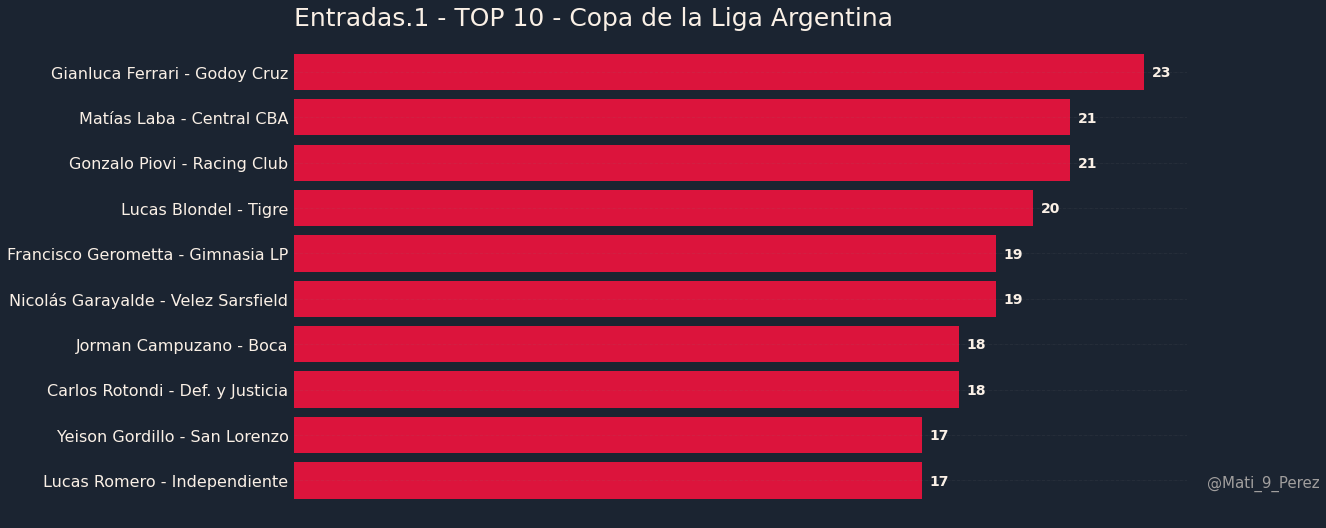

transData(0,0) = [144.  81.]


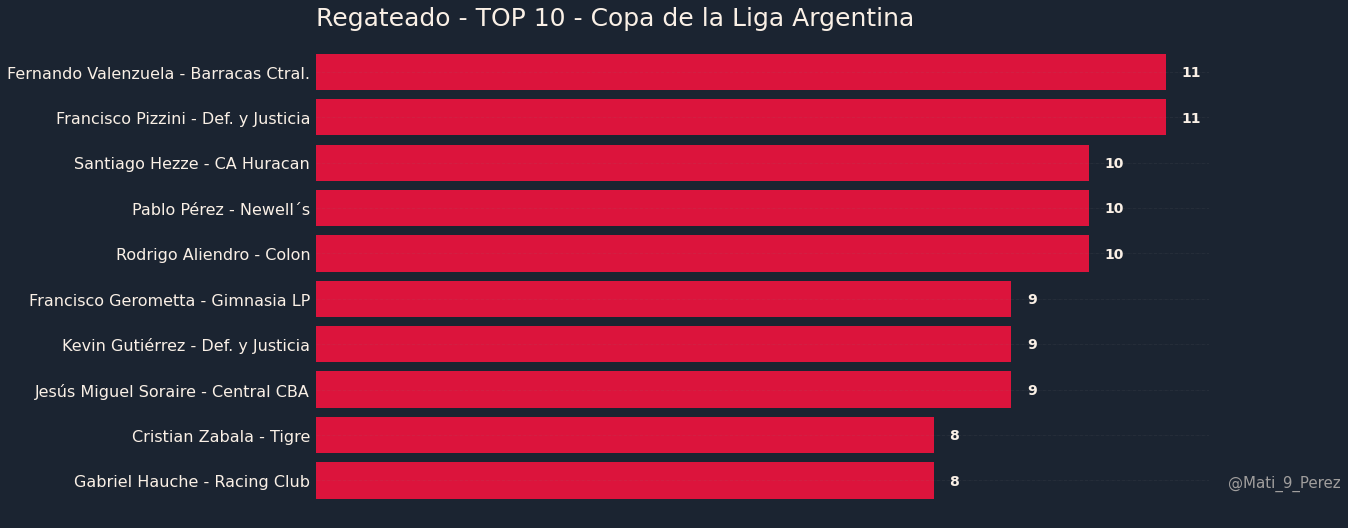

transData(0,0) = [144.  81.]


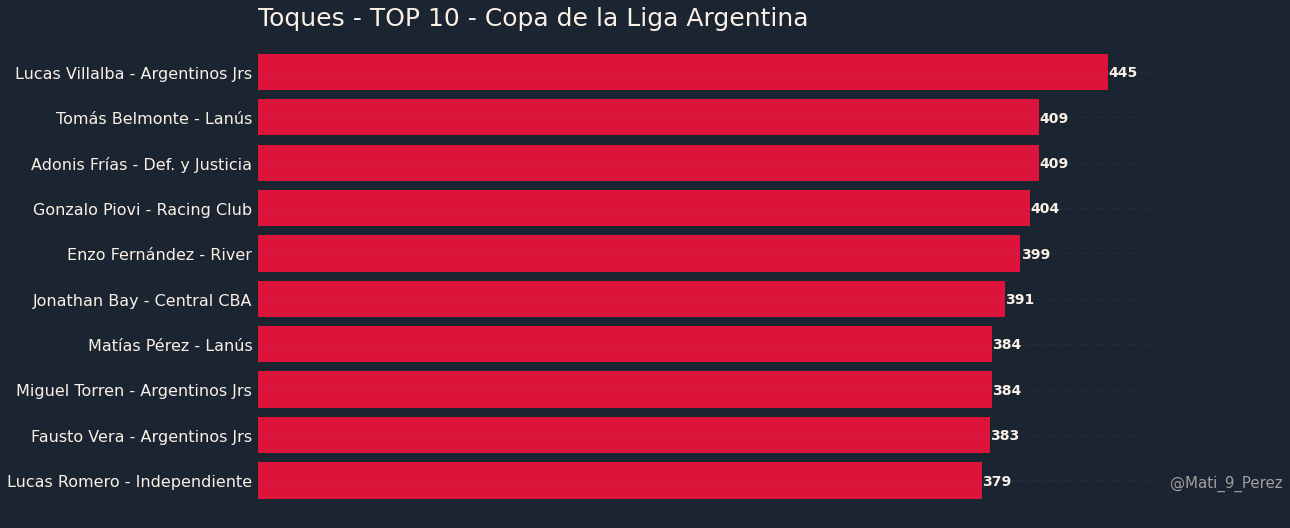

transData(0,0) = [144.  81.]


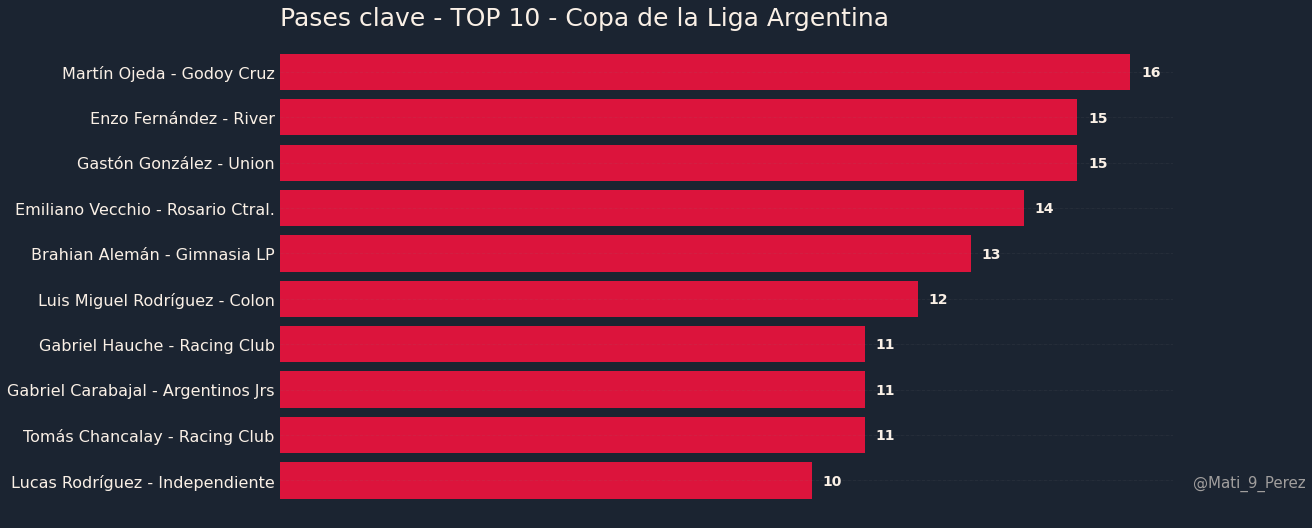

transData(0,0) = [144.  81.]


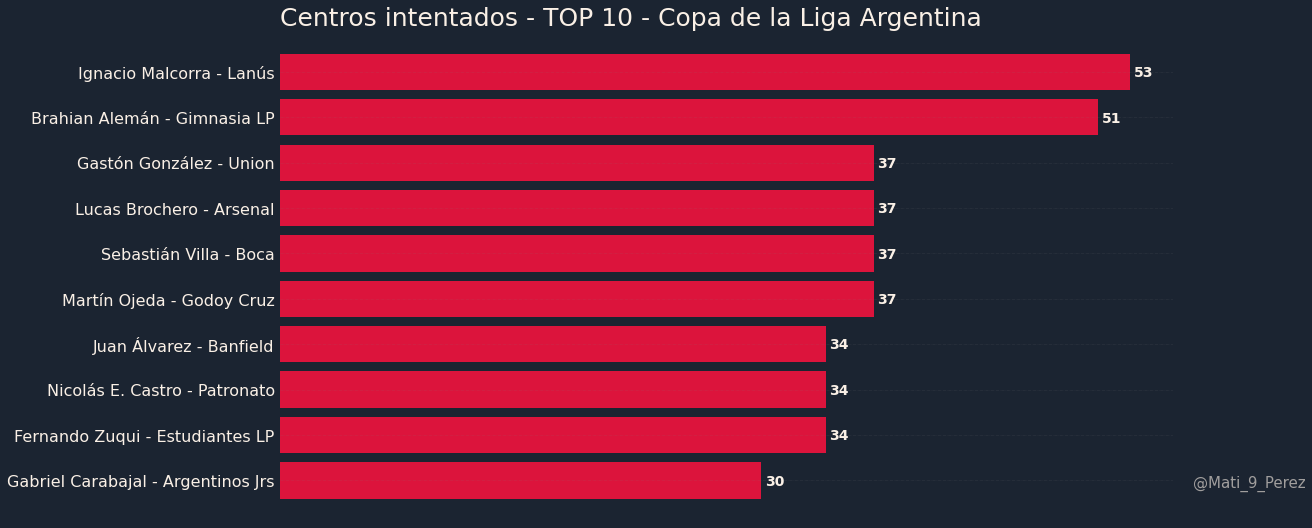

transData(0,0) = [144.  81.]


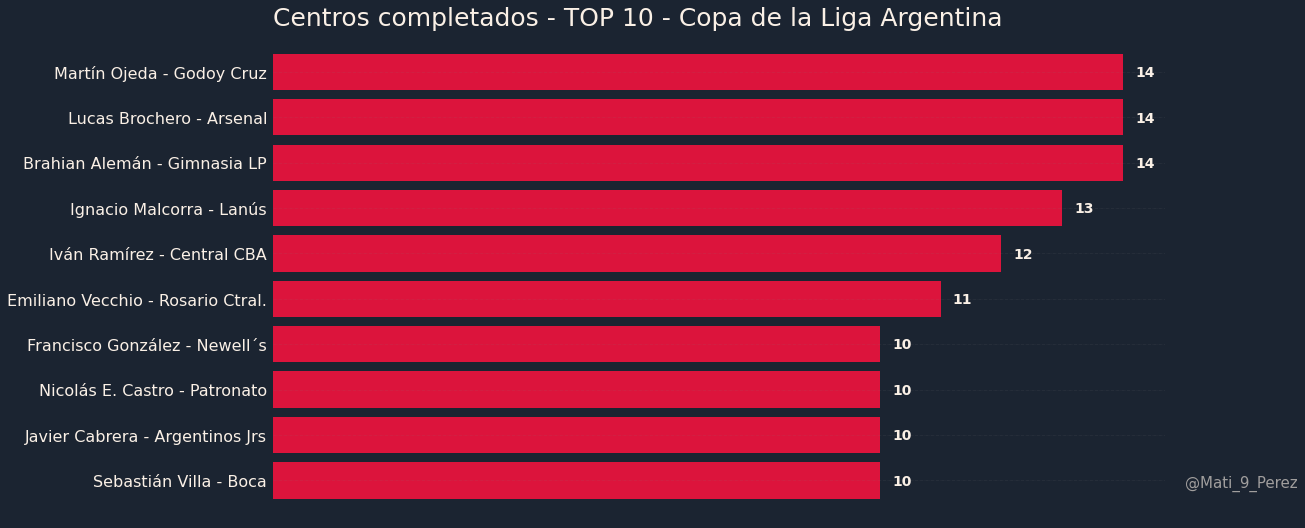

transData(0,0) = [144.  81.]


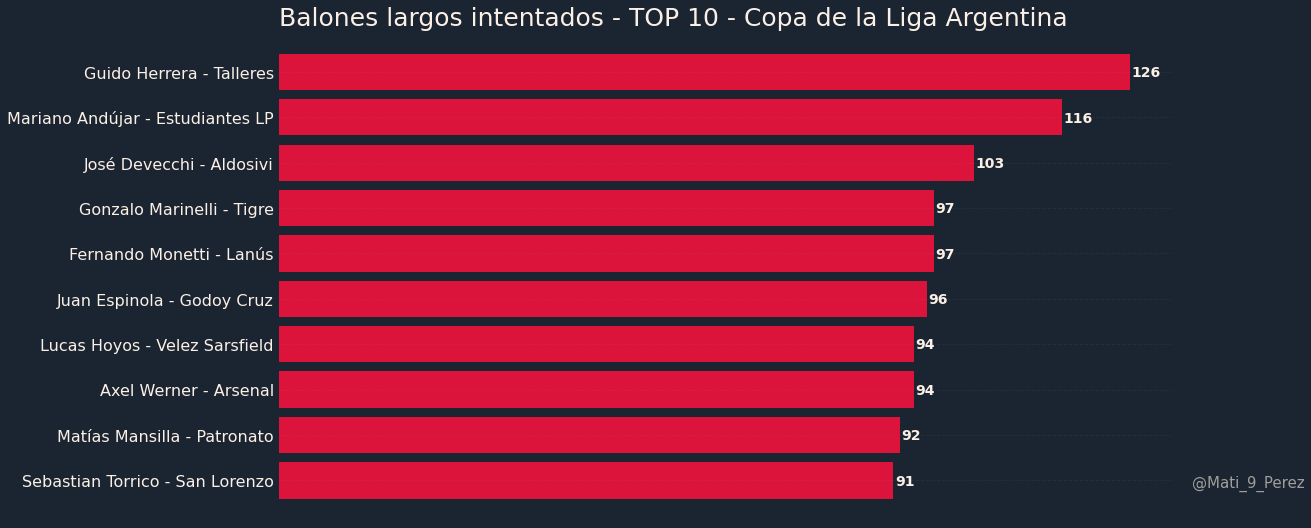

transData(0,0) = [144.  81.]


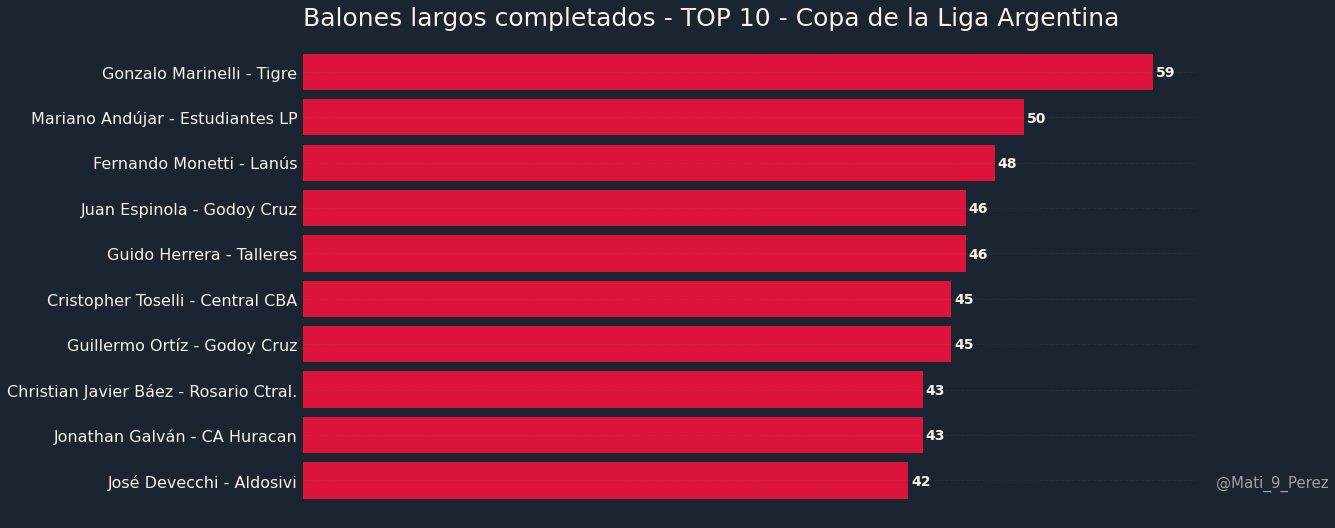

transData(0,0) = [144.  81.]


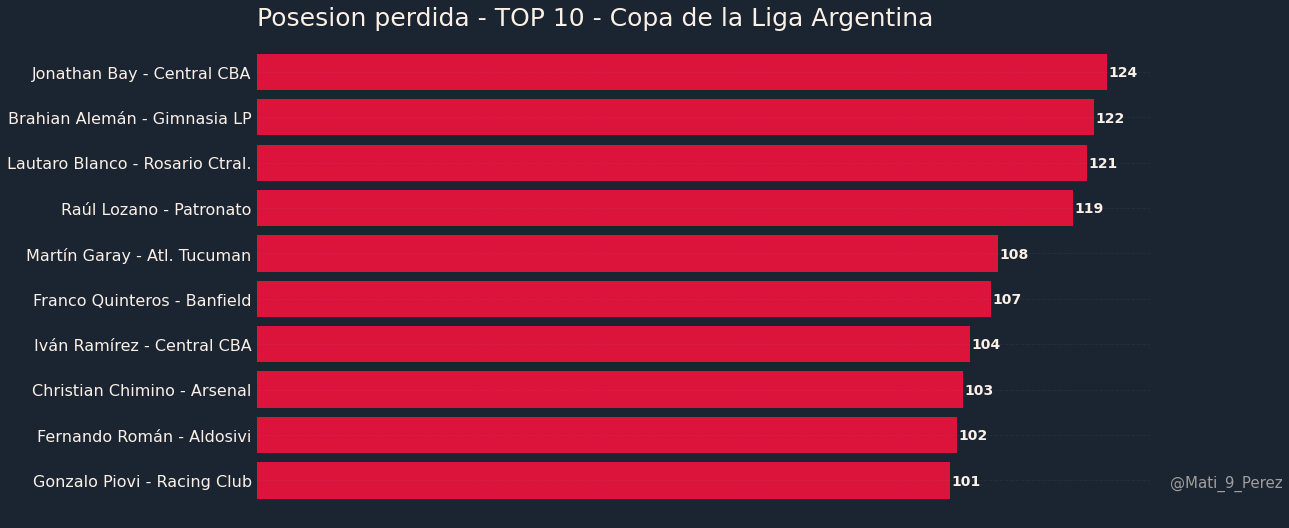

transData(0,0) = [144.  81.]


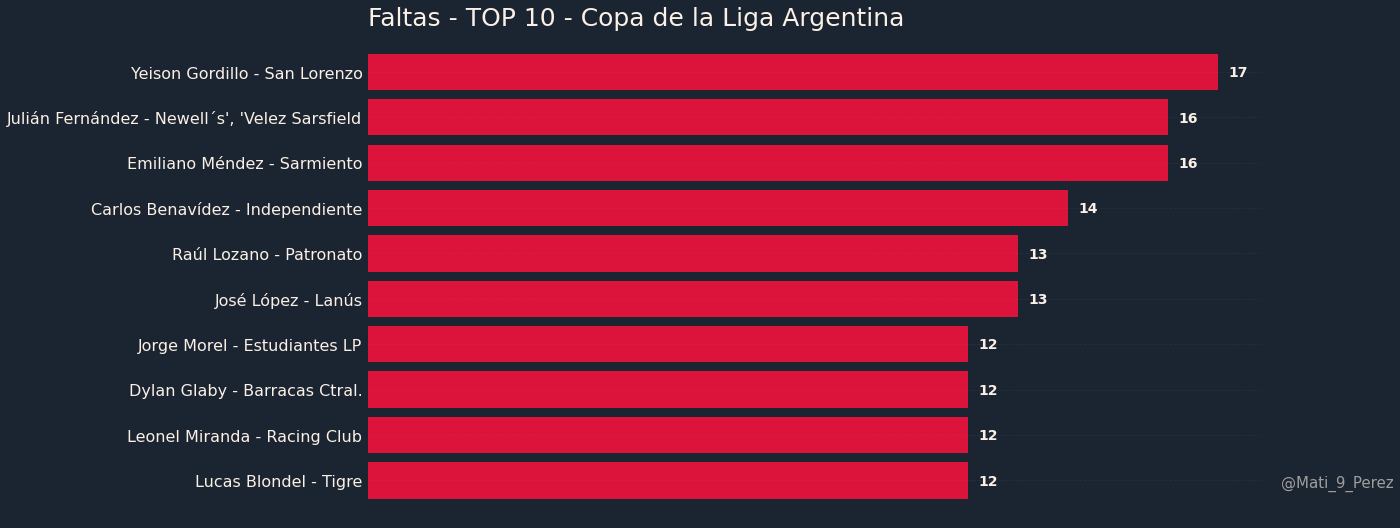

transData(0,0) = [144.  81.]


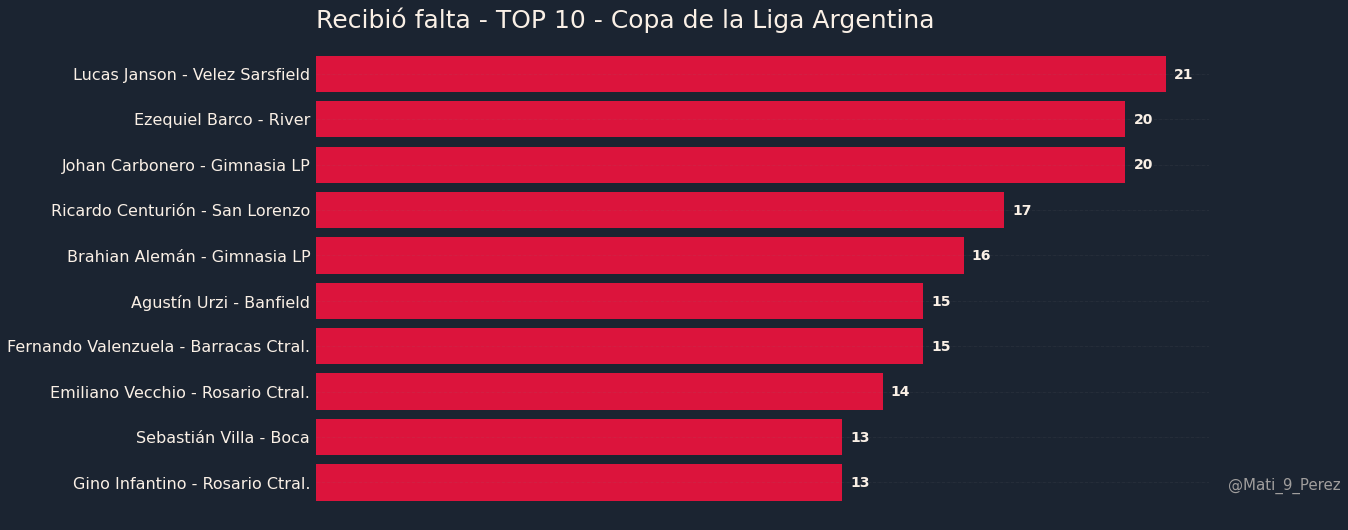

transData(0,0) = [144.  81.]


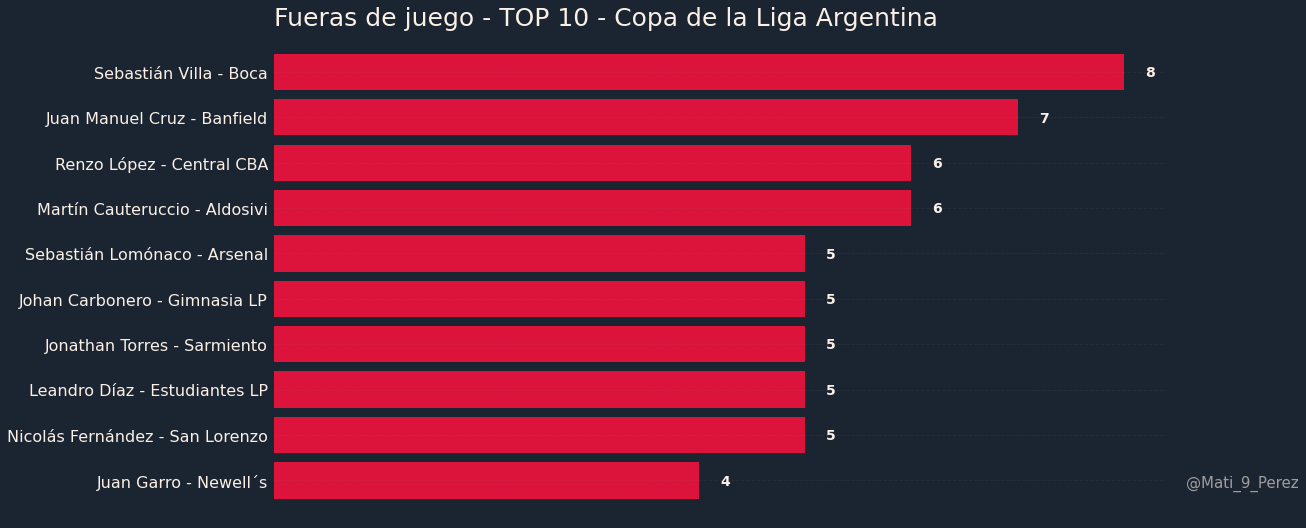

transData(0,0) = [144.  81.]


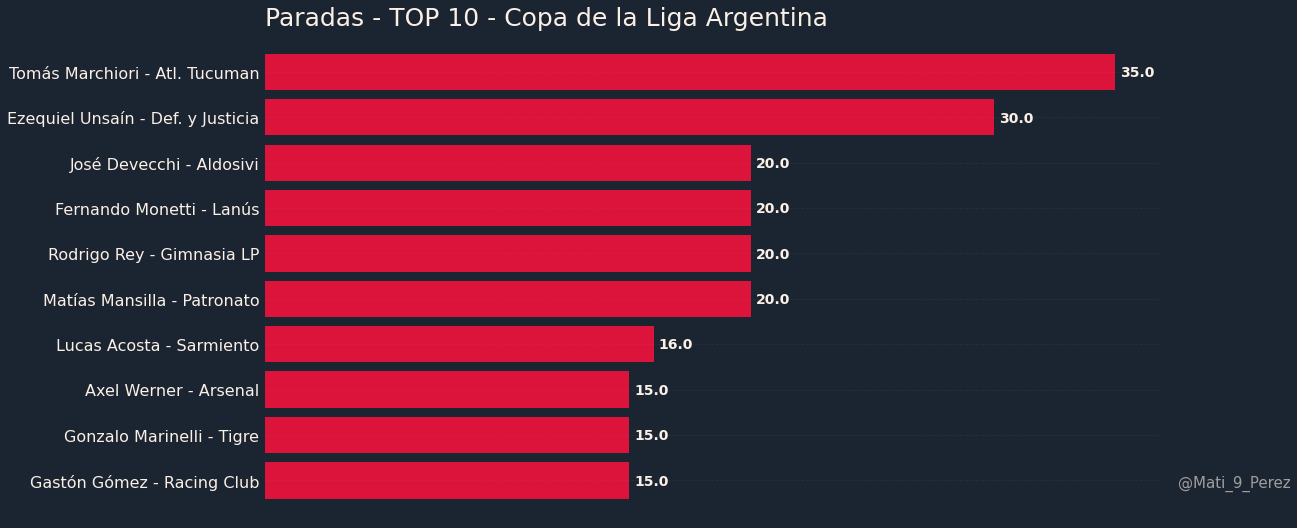

transData(0,0) = [144.  81.]


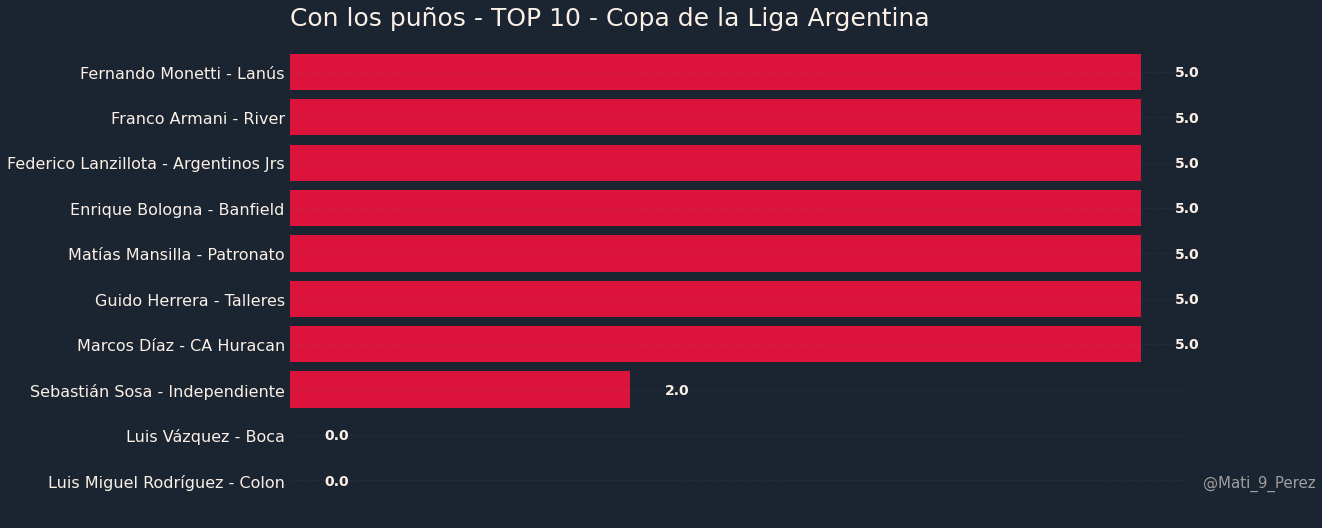

transData(0,0) = [144.  81.]


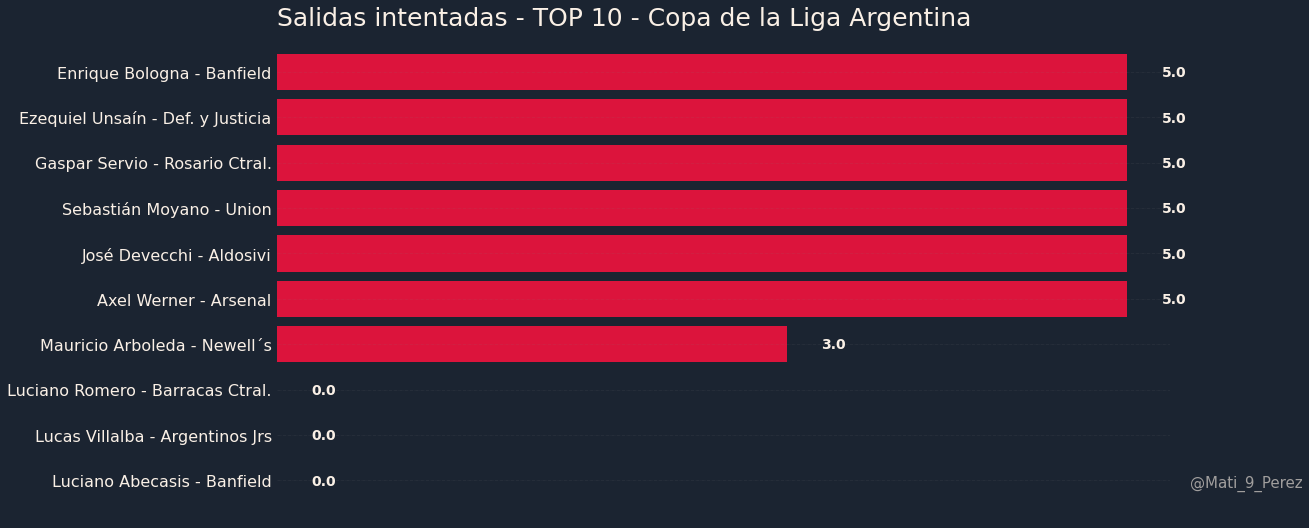

transData(0,0) = [144.  81.]


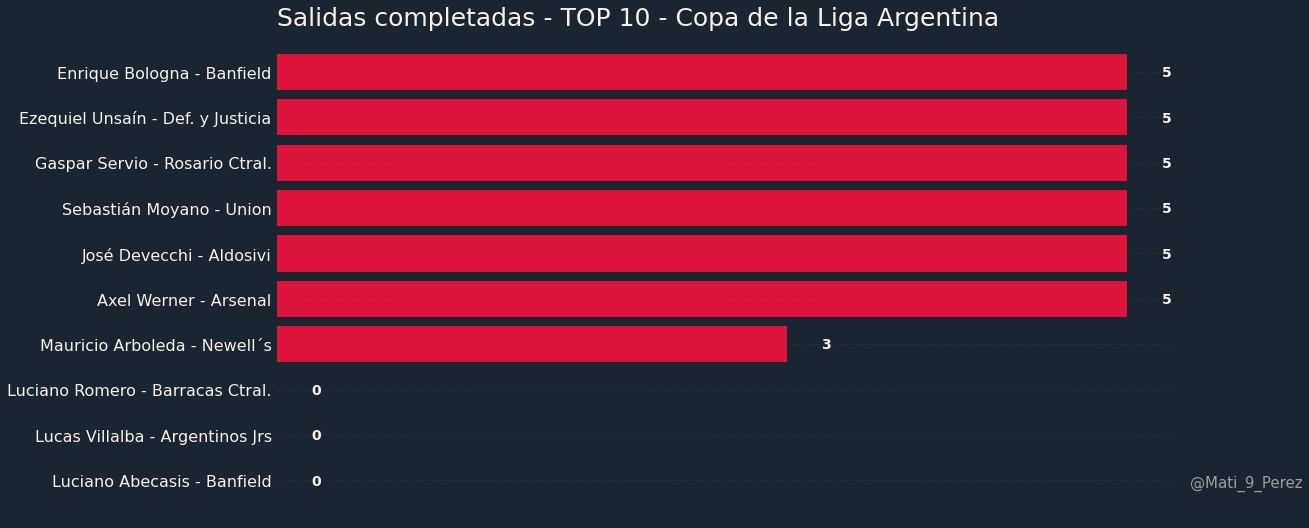

transData(0,0) = [144.  81.]


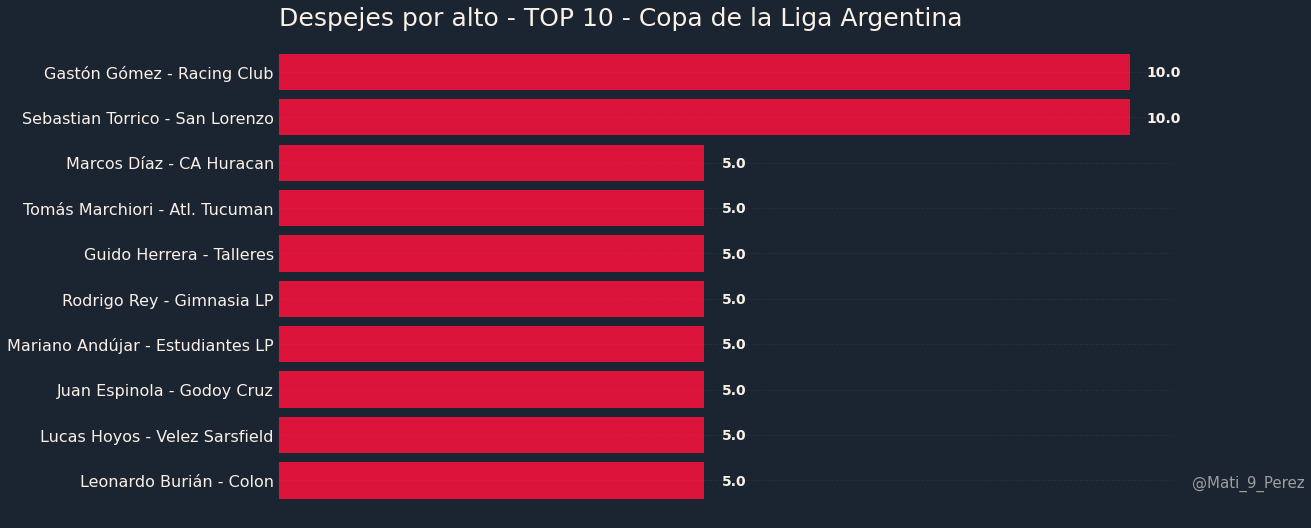

hola
hola


KeyError: 'Resultado'

In [3]:
#Analisis de Jugadores (TODOS LOS PARAMETROS)
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as image

#function to scale the image to desires length and with
for a in BIGDATA.columns: 
    if a=='Equipo' or a=='Notas'or a=='Fecha' or a=='Unnamed: 43' or a=='Posicion':
        print('hola')
    else:
        parametro=a
        #nombre=BIGDATA.sort_values(by=[parametro],ascending= False).head(10).index
        nombre=BIGDATA.groupby(['Nombre']).sum().sort_values(by=parametro,ascending=False).head(10).index
        #equipo=BIGDATA.sort_values(by=[parametro],ascending= False)['Equipo'].head(10)
        #dicc = BIGDATA.groupby("Nombre")["Equipo"].sort_values(by='Pases acertados',ascending=False).head(10).unique().apply(list).to_dict()
        equipo=[]
        dicc = BIGDATA.groupby("Nombre")["Equipo"].unique().apply(list).to_dict()
        for i in nombre:
            equipo.append(str(dicc[i])[2:-2])
        abscisa=nombre+" - "+equipo
        #abscisa=nombre+" ("+equipo+")"
        cantidad=BIGDATA.groupby(['Nombre']).sum().sort_values(by=parametro,ascending=False)[parametro].head(10)
        #cantidad = BIGDATA.sort_values(by=[parametro],ascending= False)[parametro].head(10)
        #imput=input()
        #beto=imput+".png"
        def scale(im, nR, nC):
            """
            parameters
            im :image
            nR:row size
            nC:column size 
            Return: scaled image 
            """
            number_rows = len(im)     # source number of rows 
            number_columns = len(im[0])  # source number of columns 
            return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  
                         for c in range(nC)] for r in range(nR)]
        def watermark(ax,x0,y0):
            """
            adds image logo and positions it on the plot
            ax: figure object 
            x0: adds x 
            y0: adds y 
            """
            img = plt.imread('Copita.png')
            #scale Image
            img =scale(img, 800, 800)


            print('transData(0,0) = {}'.format(ax.transData.transform((0,0))))
            ax.figure.figimage(img, x0,y0, alpha=.65, zorder=1,origin="upper")

        #name = BIGDATA.sort_values(by=['Pases acertados'],ascending= False).head(12).index

        # Figure Size
        fig, ax = plt.subplots(figsize =(16, 9))
        watermark(ax,4650,200)
        ax.barh(abscisa, cantidad,0.8,color="crimson")
        fig.patch.set_facecolor('xkcd:dark')
        ax.set_facecolor('xkcd:dark')
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)

        # Remove x, y Ticks
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')

        # Add padding between axes and labels
        #ax.xaxis.set_tick_params(pad = 5,colors='linen')
        ax.yaxis.set_tick_params(pad = 2,colors='linen',labelsize=16)
        ax.axes.get_xaxis().set_visible(False)

        # Add x, y gridlines
        ax.grid(b = True, color ='grey',
                linestyle ='-.', linewidth = 0.5,
                alpha = 0.2)

        # Show top values
        ax.invert_yaxis()

        # Add annotation to bars
        for i in ax.patches:
            plt.text(i.get_width()+0.2, i.get_y()+0.5,
                     str(round((i.get_width()), 2)),
                     fontsize = 14, fontweight ='bold',
                     color ='linen')
        #ax.tick_params(axis='x', colors='red')
        #ax.tick_params(axis='y', colors='red') 
        # Add Plot Title
        ax.set_title(parametro+' - TOP 10 - Copa de la Liga Argentina',
                     loc ='left', color='linen',fontsize = 25)

        # Add Text watermark
        #fig.text(0, 0.88, '@Mati_9_Perez', fontsize = 15,color ='linen', ha ='right', va ='bottom',alpha = 0.7)
        fig.text(1.015, 0.17, '@Mati_9_Perez', fontsize = 15,color ='linen', ha ='right', va ='bottom',alpha = 0.6)
        # Show Plot
        plt.show()
        fig.savefig(parametro+' F5.png', dpi = 300, bbox_inches="tight")

Index(['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al Palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases', 'Pases acierte', 'Pases totales', 'Porc. Pases efectivos',
       'Pases largos', 'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados', 'Regates',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes', 'equipo'],
      dtype='object')
transData(0,0) = [144.  81.]


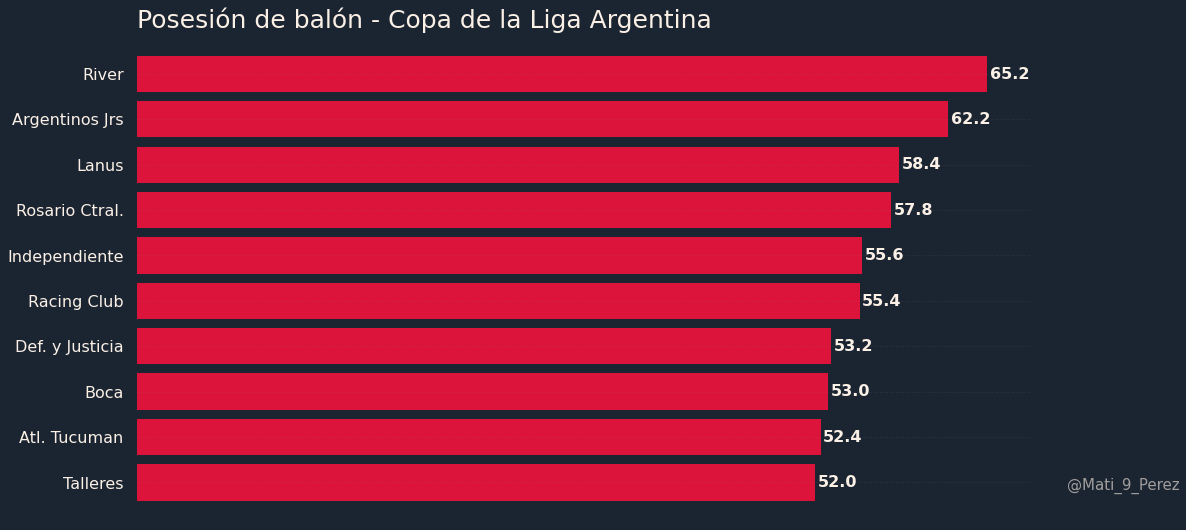

transData(0,0) = [144.  81.]


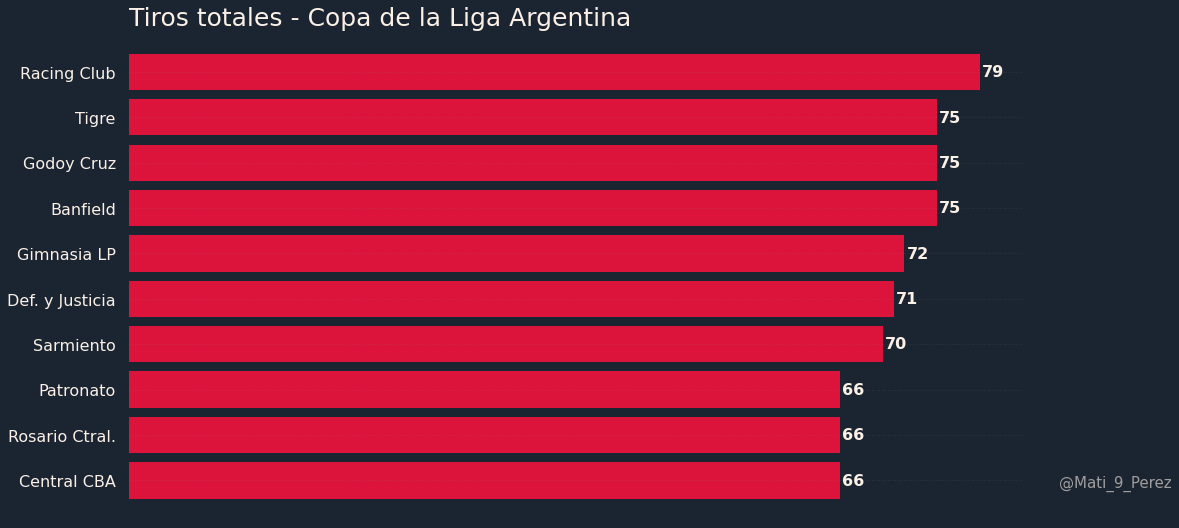

transData(0,0) = [144.  81.]


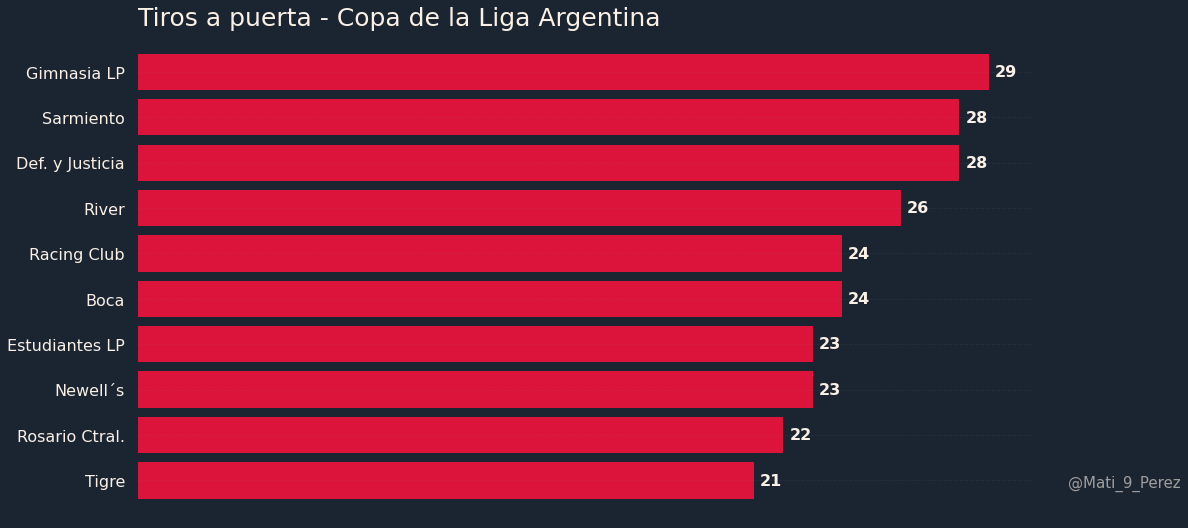

transData(0,0) = [144.  81.]


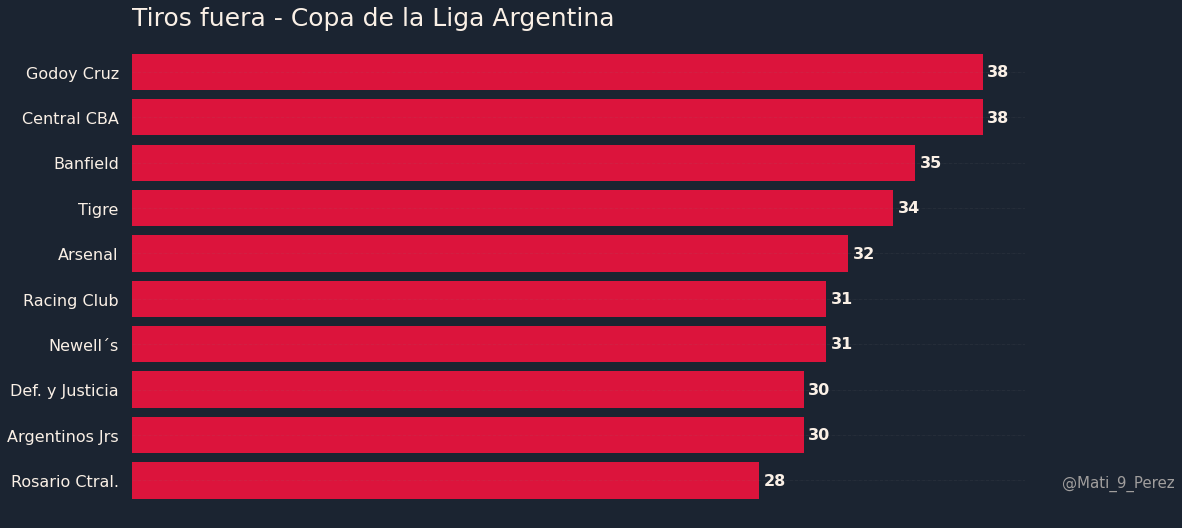

transData(0,0) = [144.  81.]


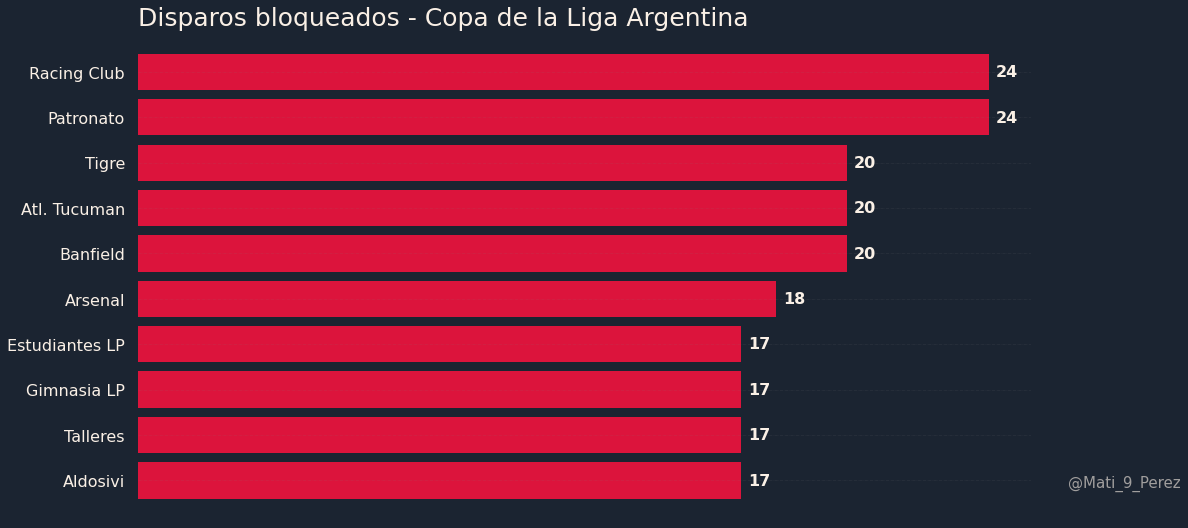

transData(0,0) = [144.  81.]


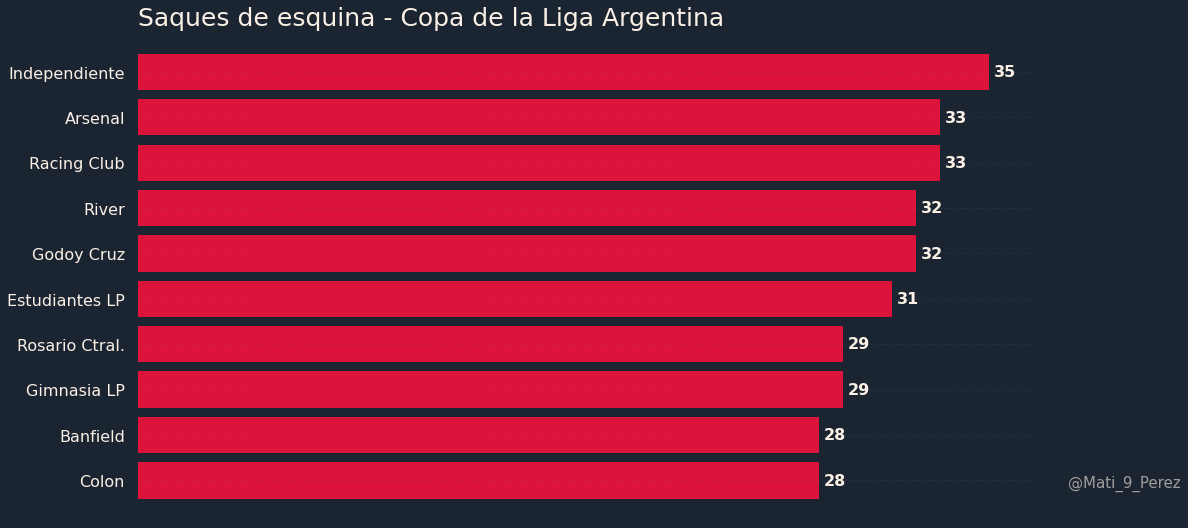

transData(0,0) = [144.  81.]


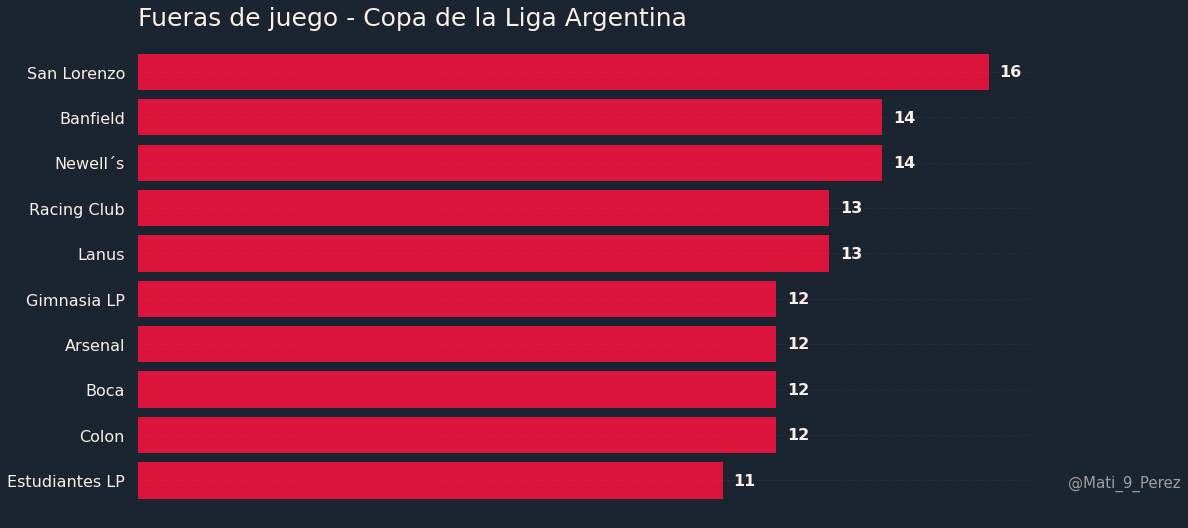

transData(0,0) = [144.  81.]


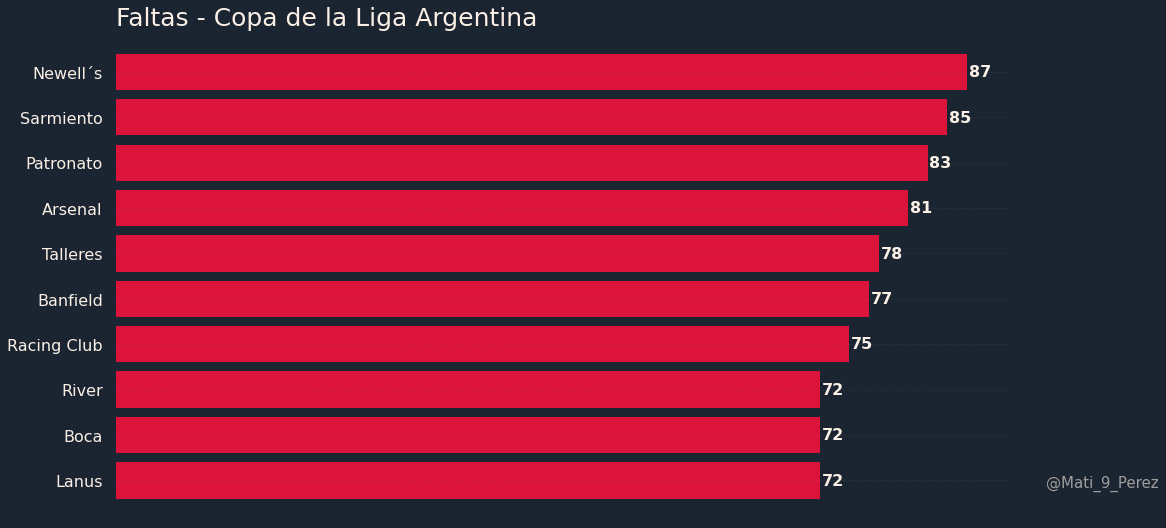

transData(0,0) = [144.  81.]


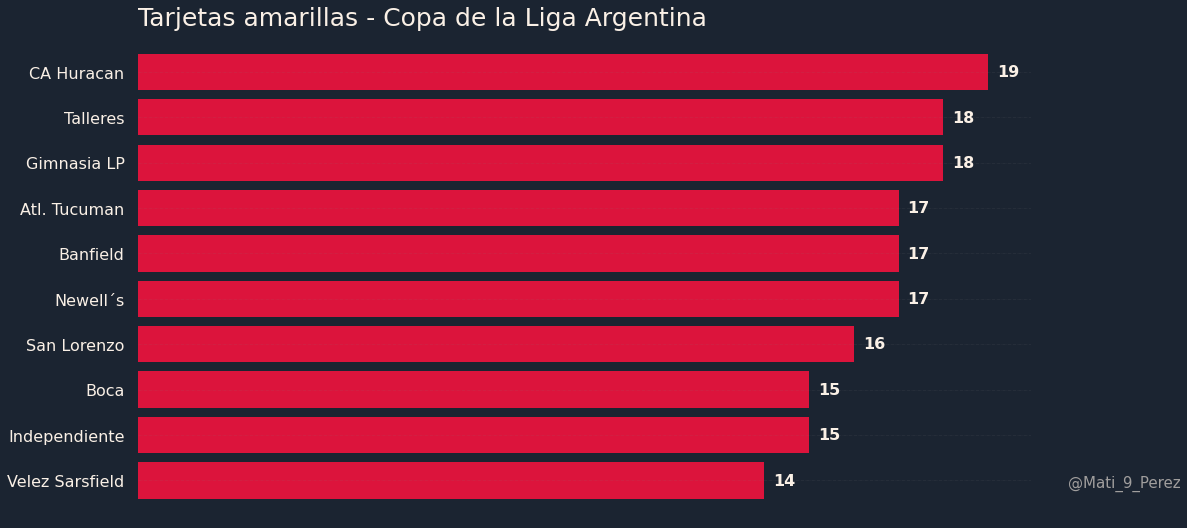

transData(0,0) = [144.  81.]


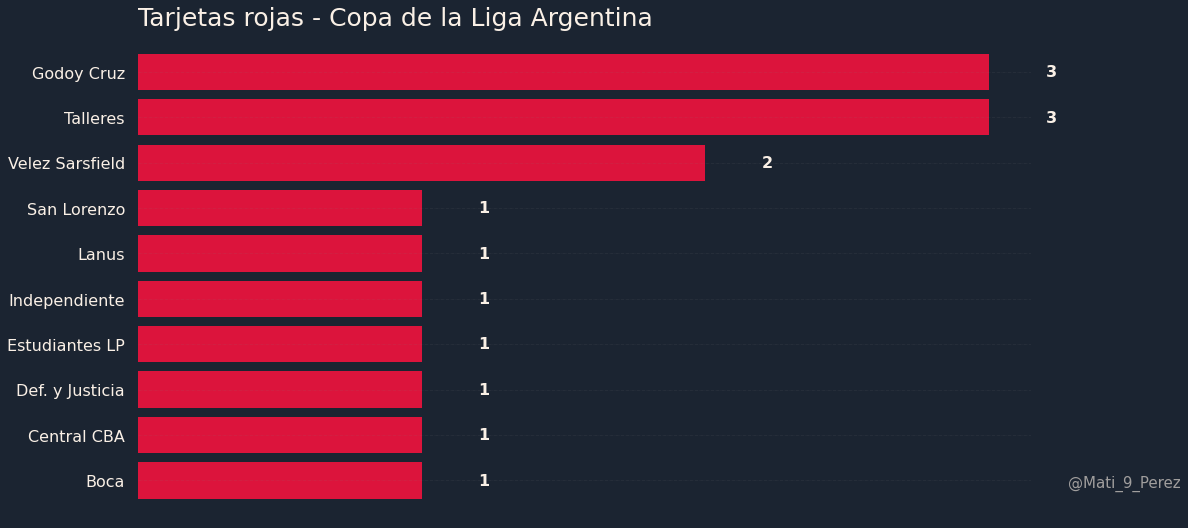

transData(0,0) = [144.  81.]


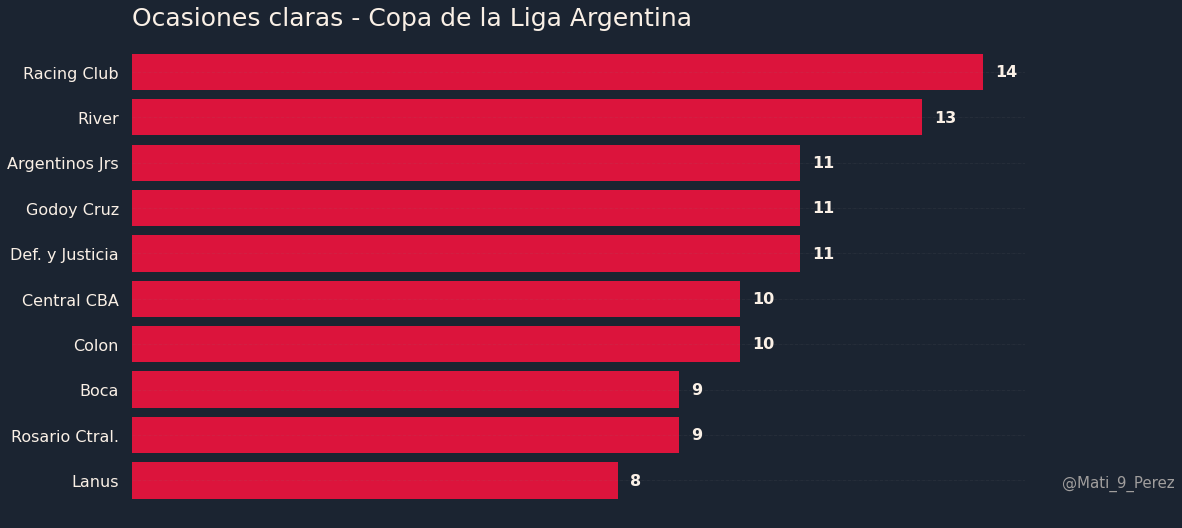

transData(0,0) = [144.  81.]


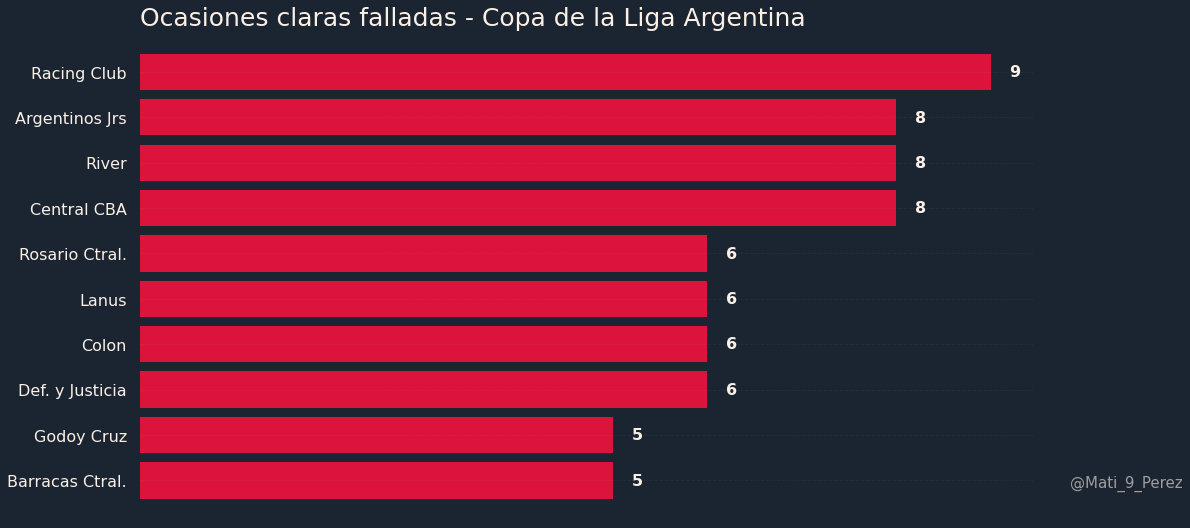

transData(0,0) = [144.  81.]


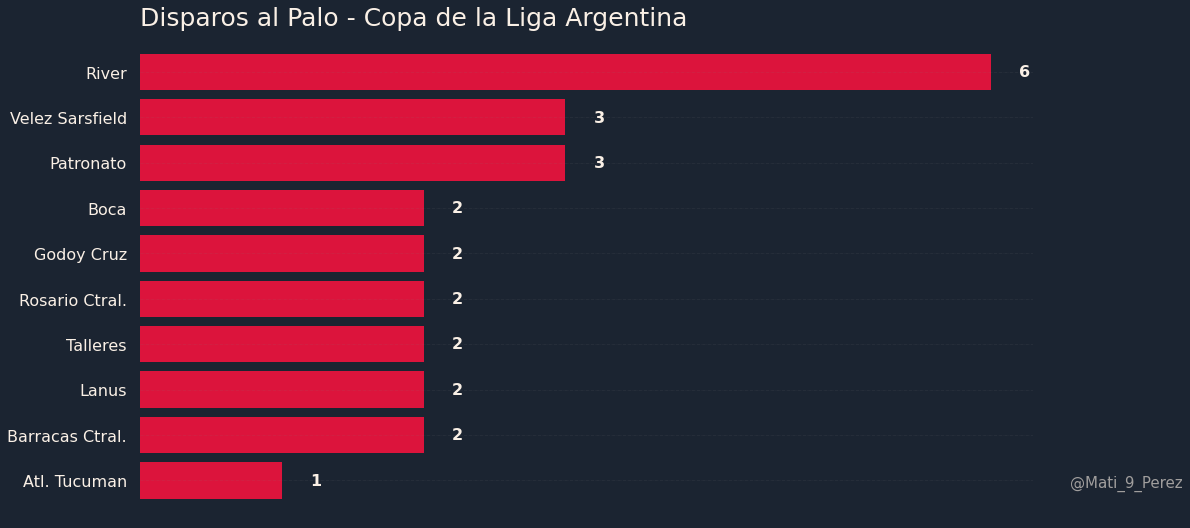

transData(0,0) = [144.  81.]


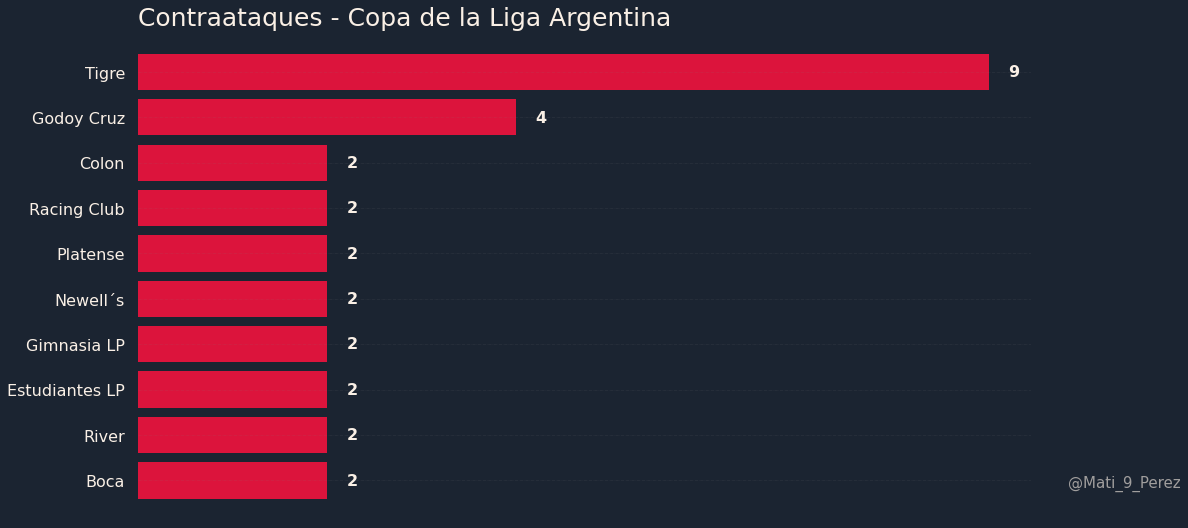

transData(0,0) = [144.  81.]


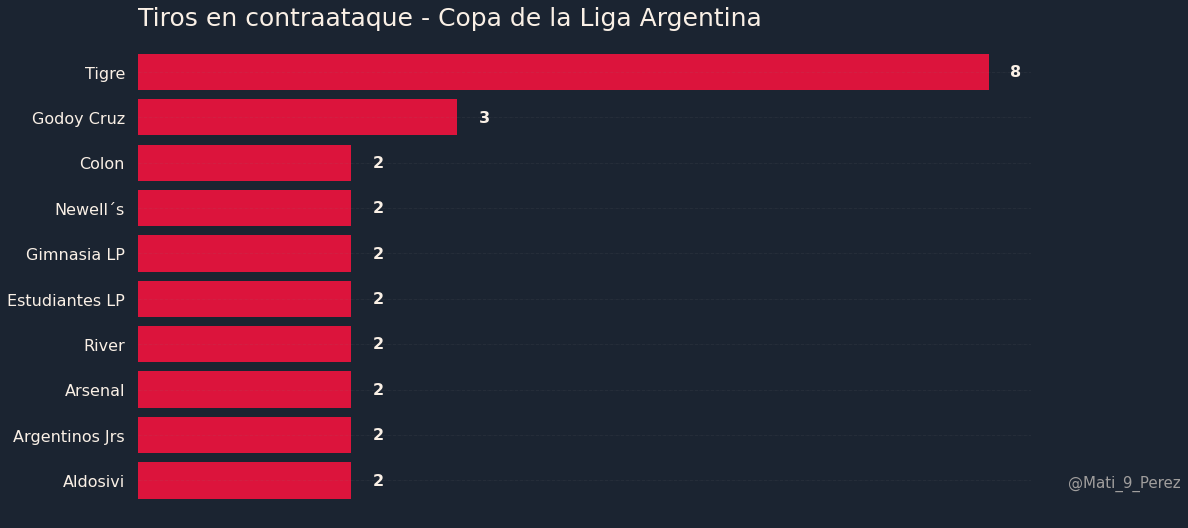

transData(0,0) = [144.  81.]


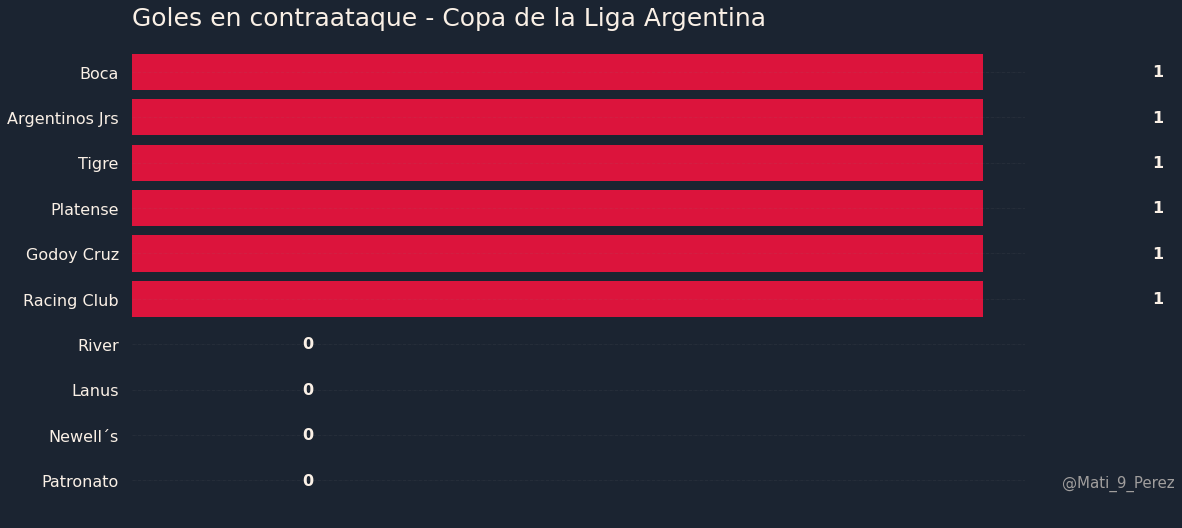

transData(0,0) = [144.  81.]


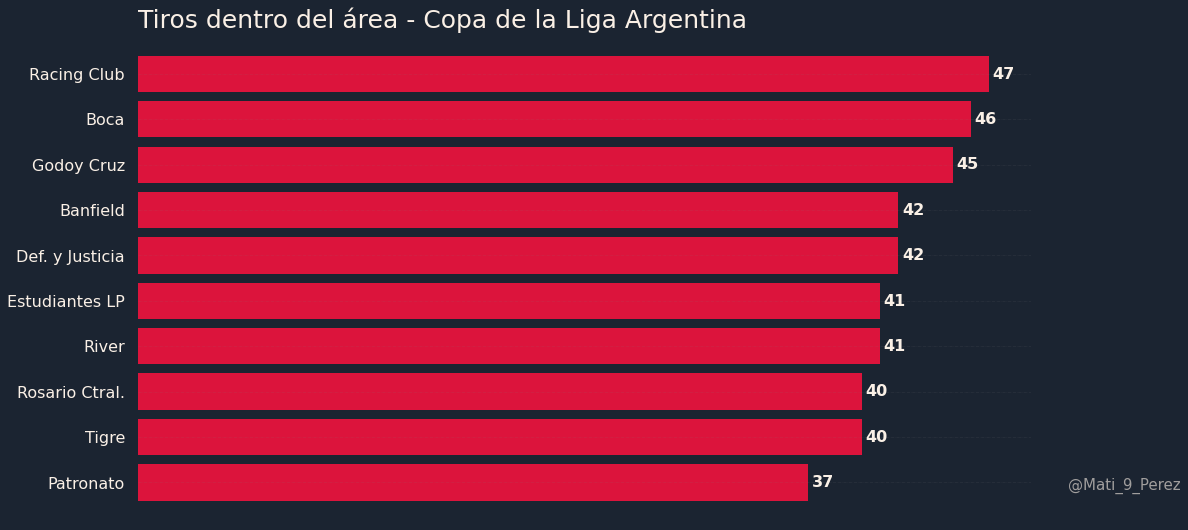

transData(0,0) = [144.  81.]


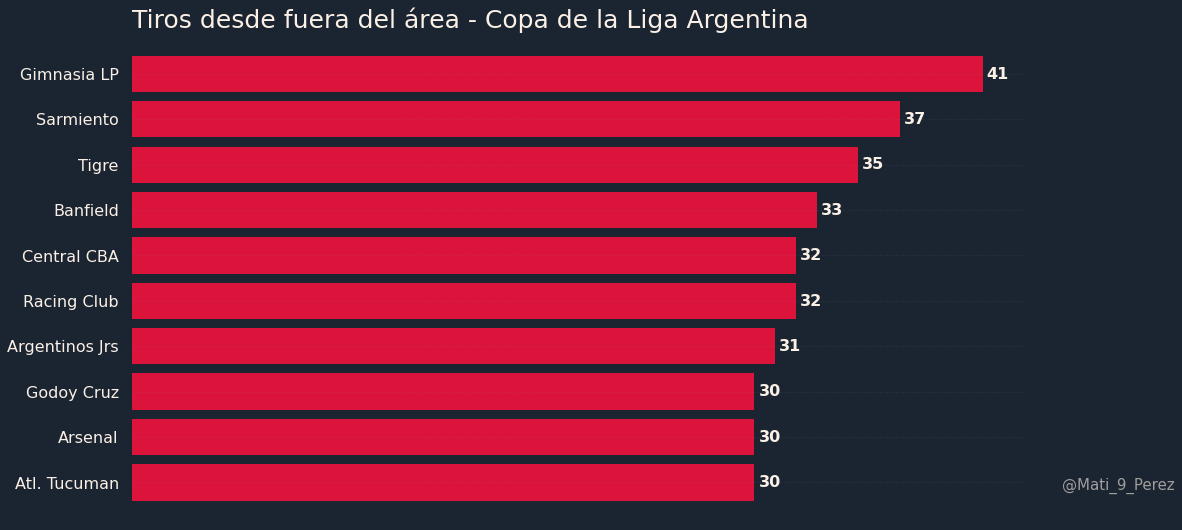

transData(0,0) = [144.  81.]


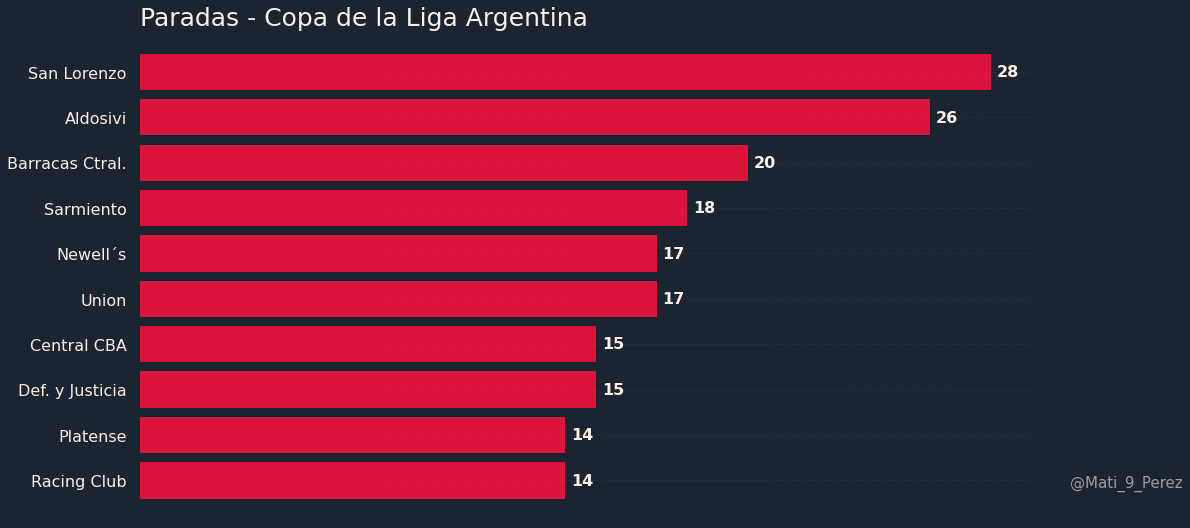

transData(0,0) = [144.  81.]


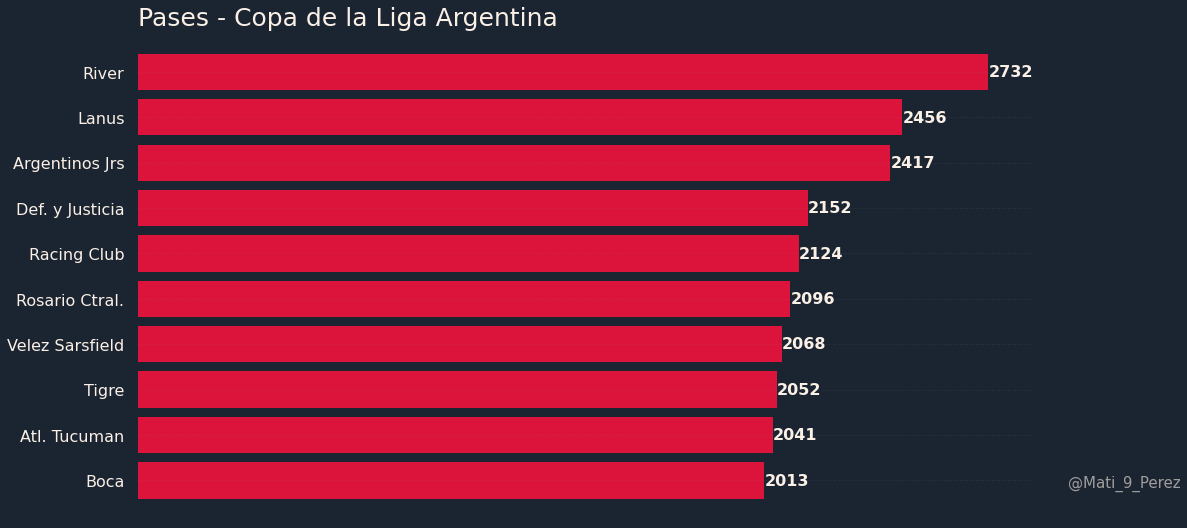

transData(0,0) = [144.  81.]


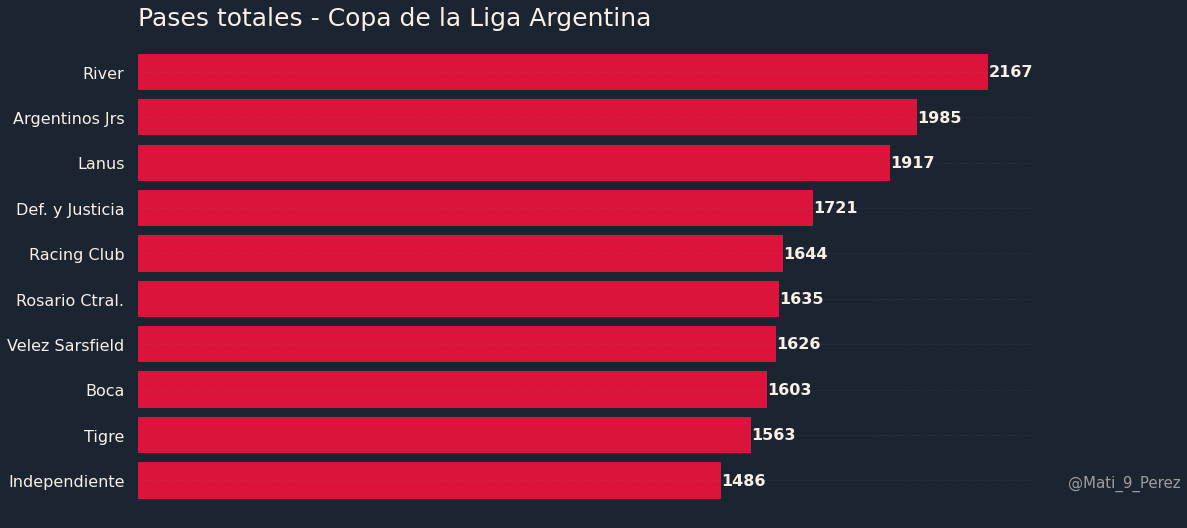

transData(0,0) = [144.  81.]


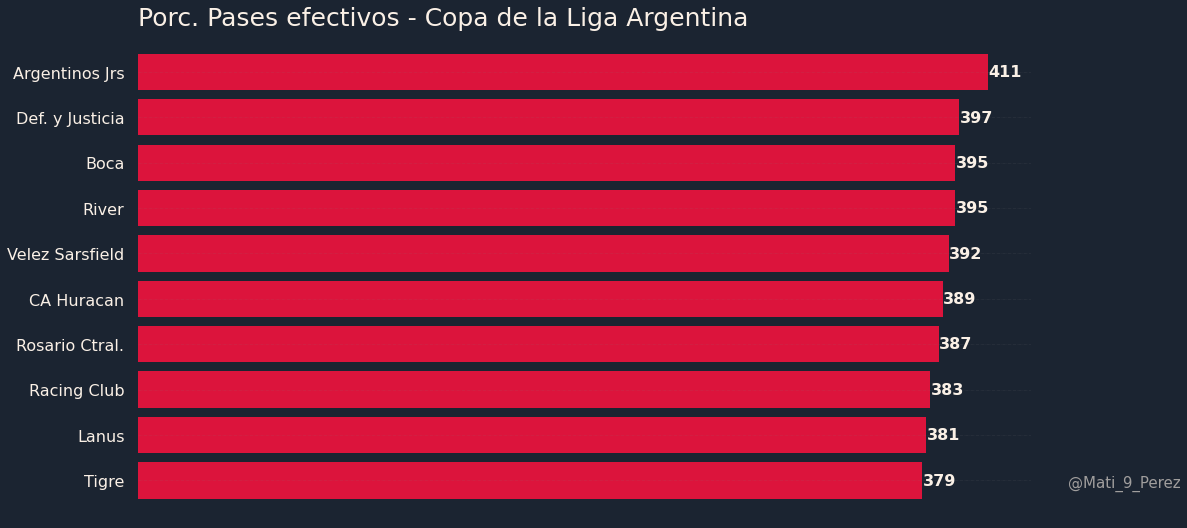

transData(0,0) = [144.  81.]


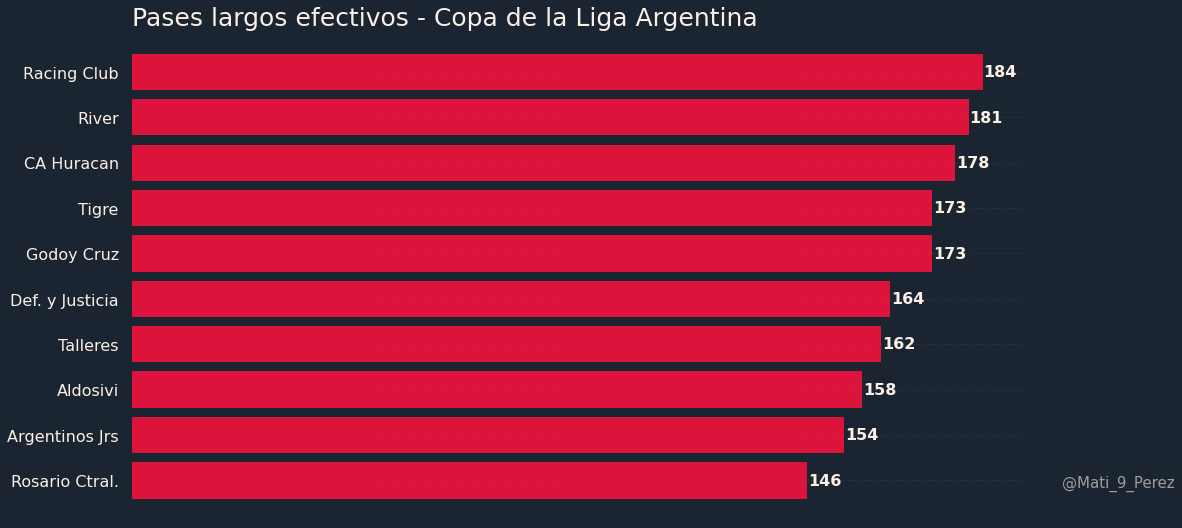

transData(0,0) = [144.  81.]


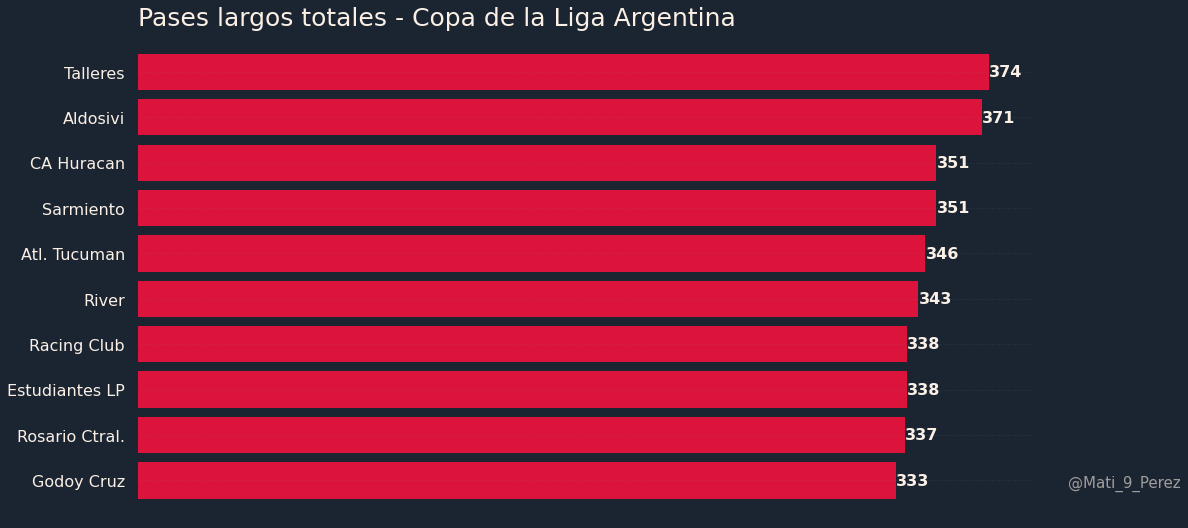

transData(0,0) = [144.  81.]


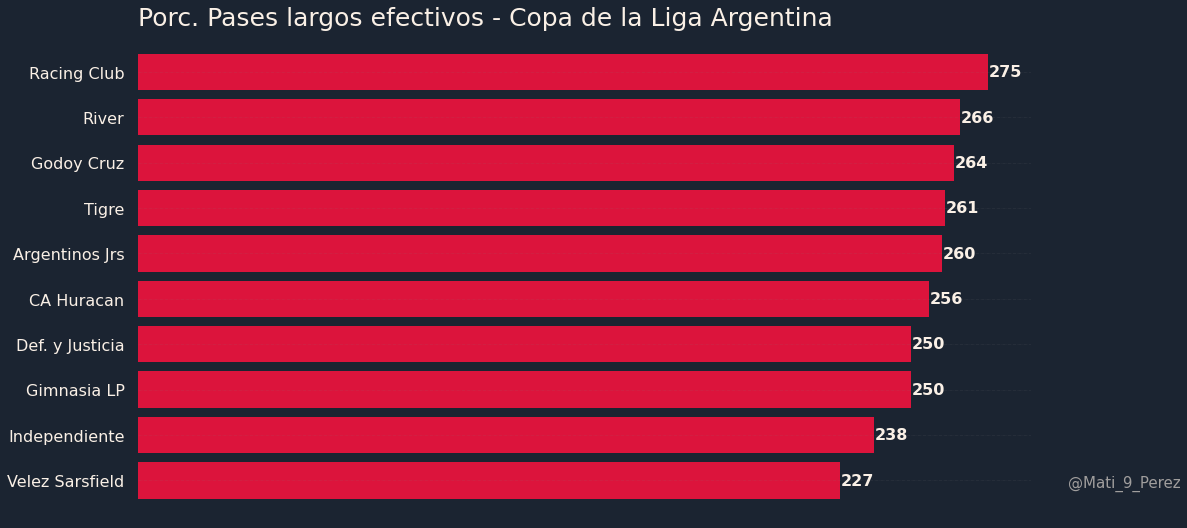

transData(0,0) = [144.  81.]


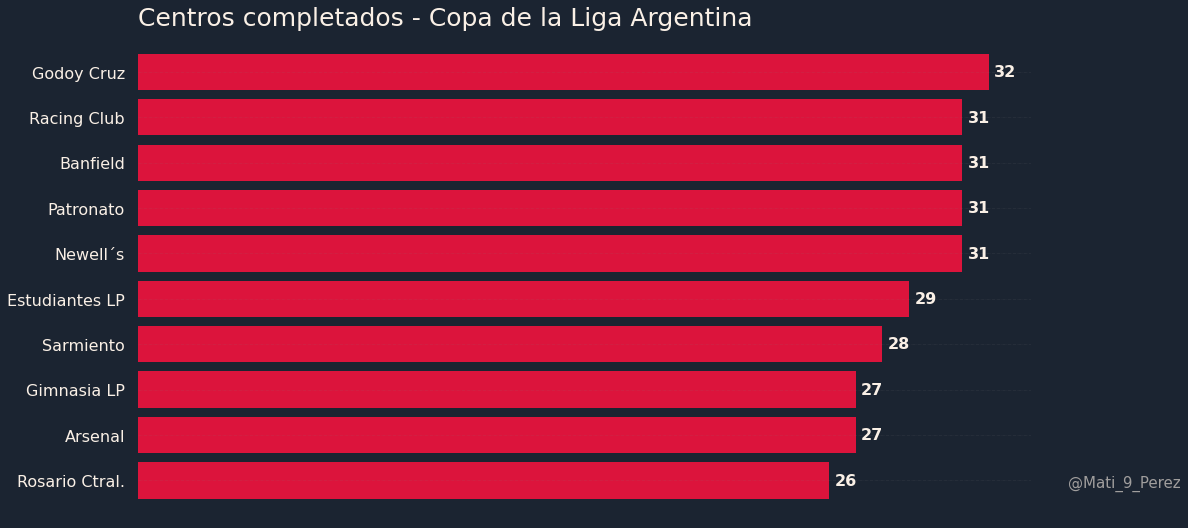

transData(0,0) = [144.  81.]


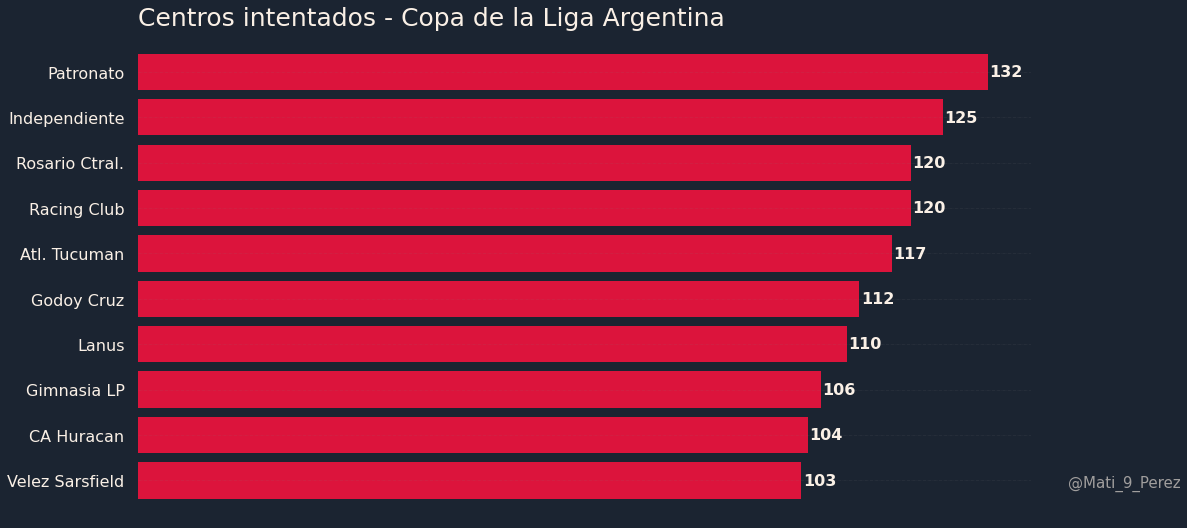

transData(0,0) = [144.  81.]


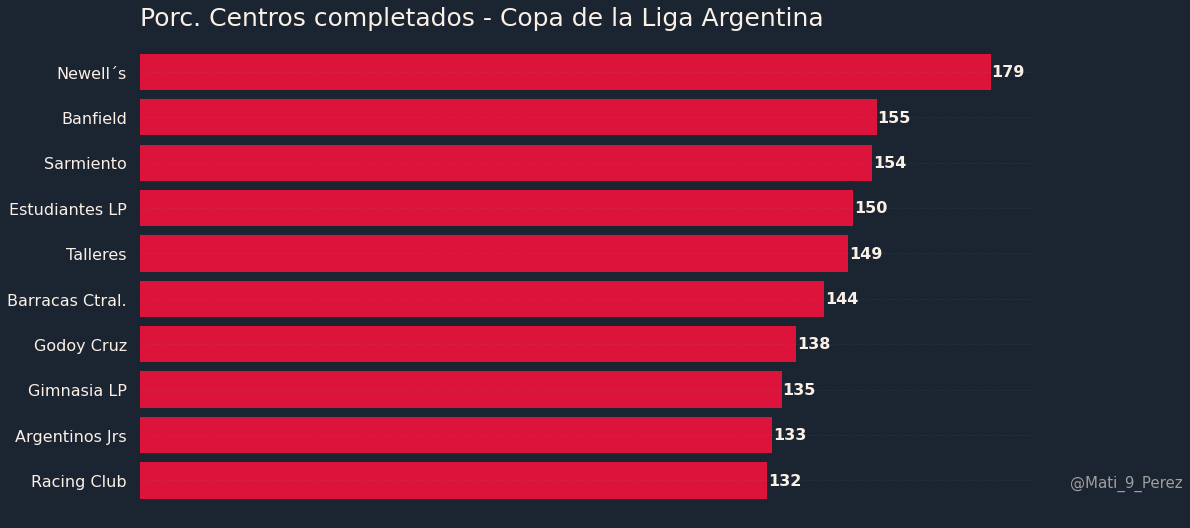

transData(0,0) = [144.  81.]


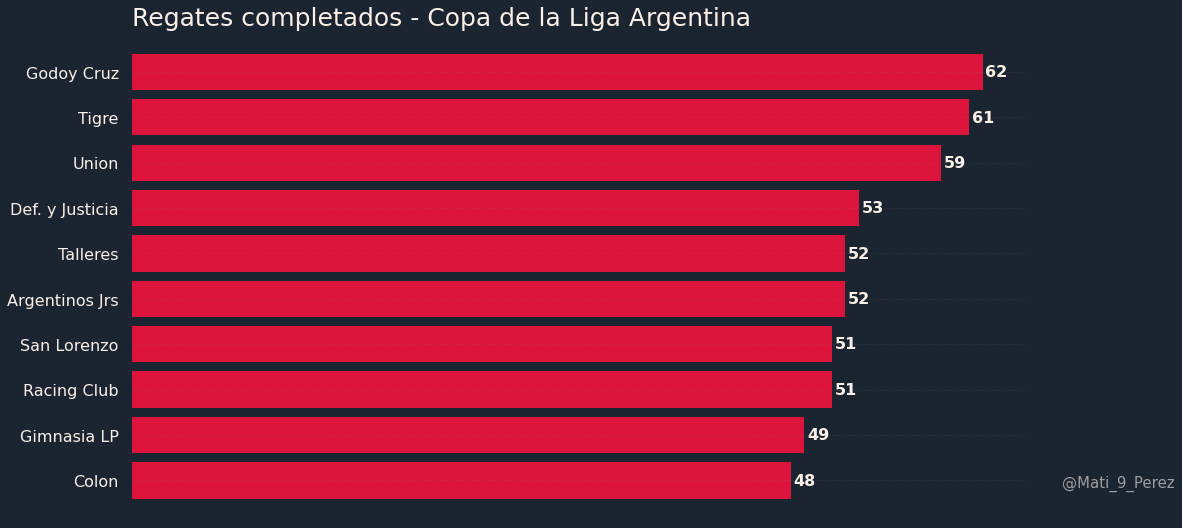

transData(0,0) = [144.  81.]


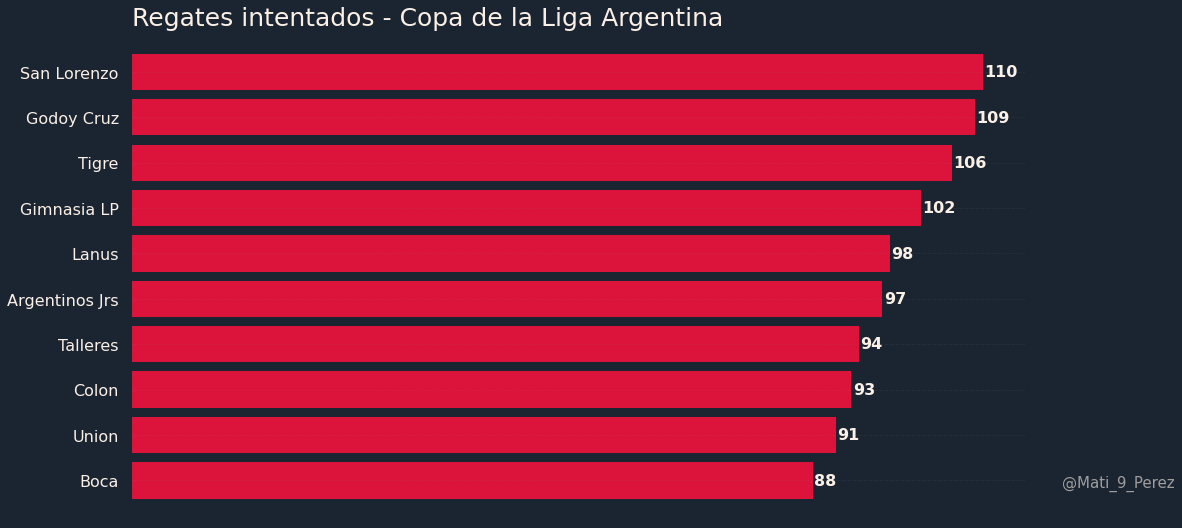

transData(0,0) = [144.  81.]


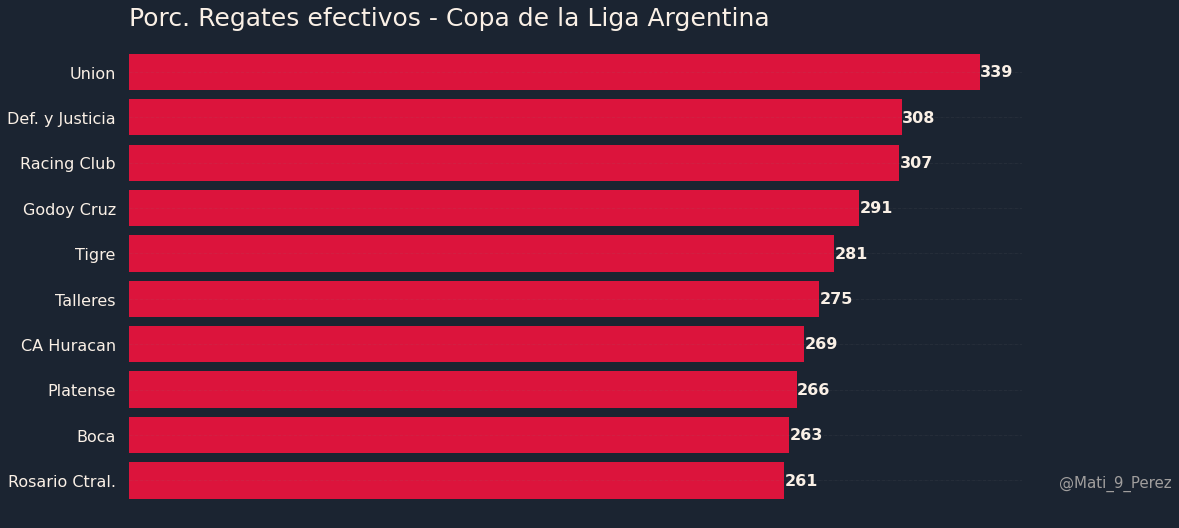

transData(0,0) = [144.  81.]


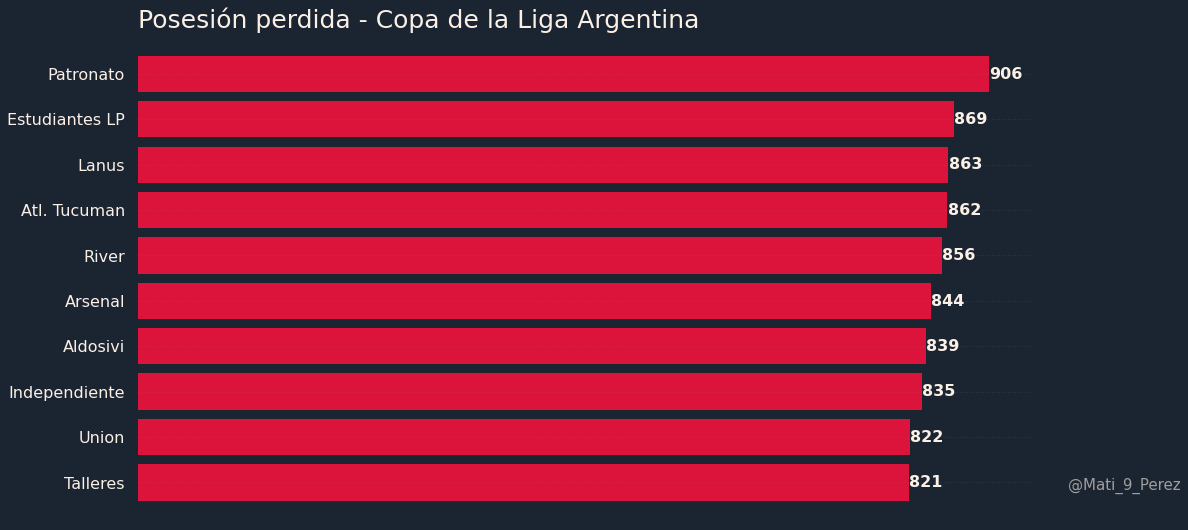

transData(0,0) = [144.  81.]


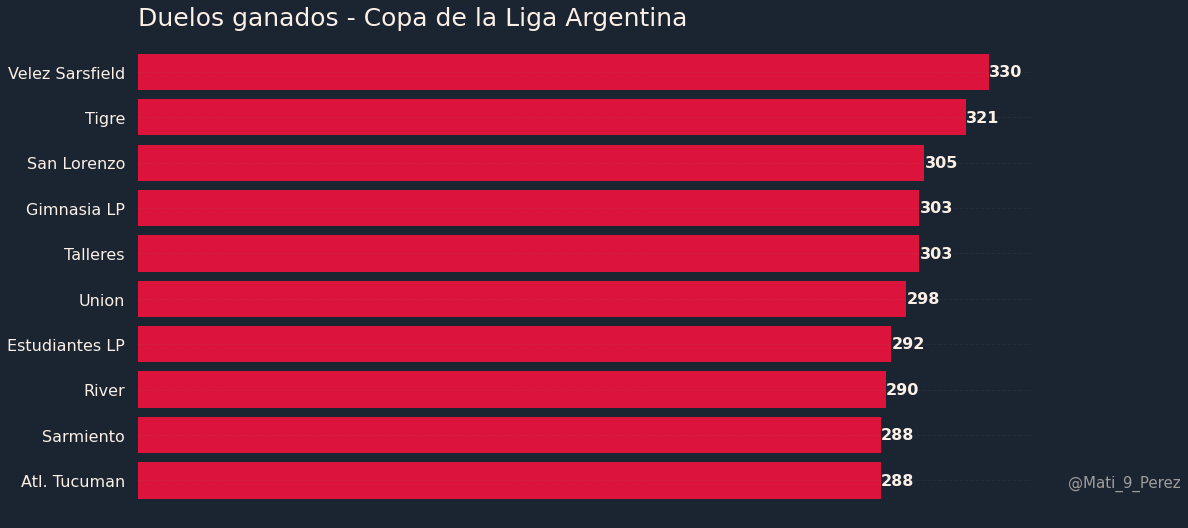

transData(0,0) = [144.  81.]


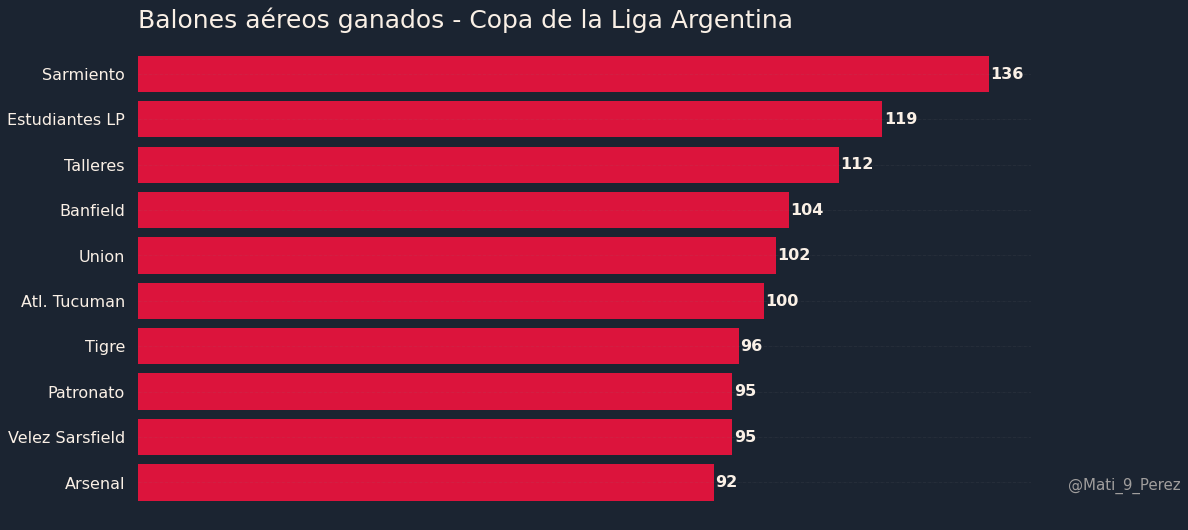

transData(0,0) = [144.  81.]


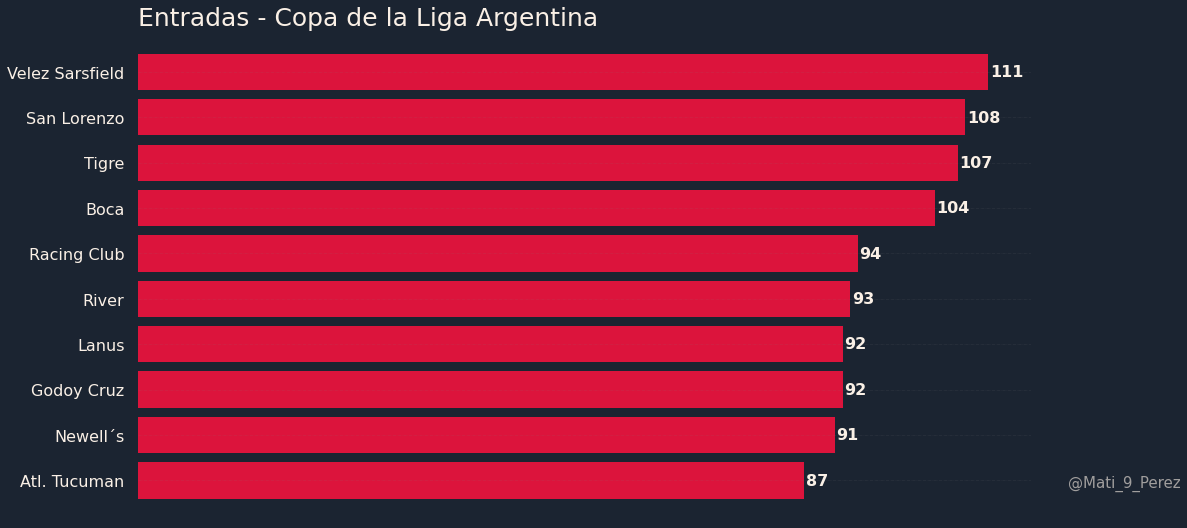

transData(0,0) = [144.  81.]


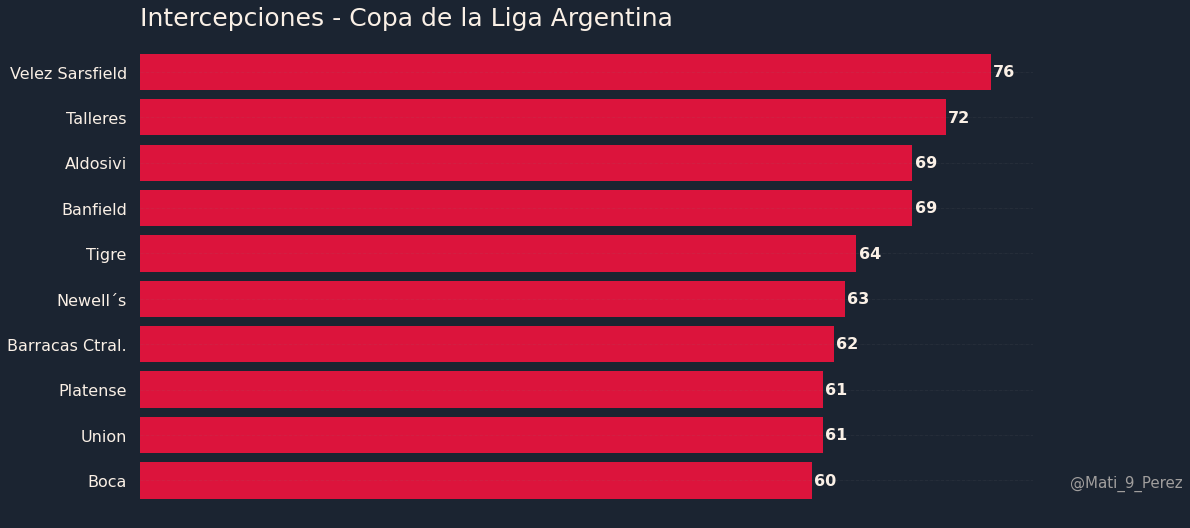

transData(0,0) = [144.  81.]


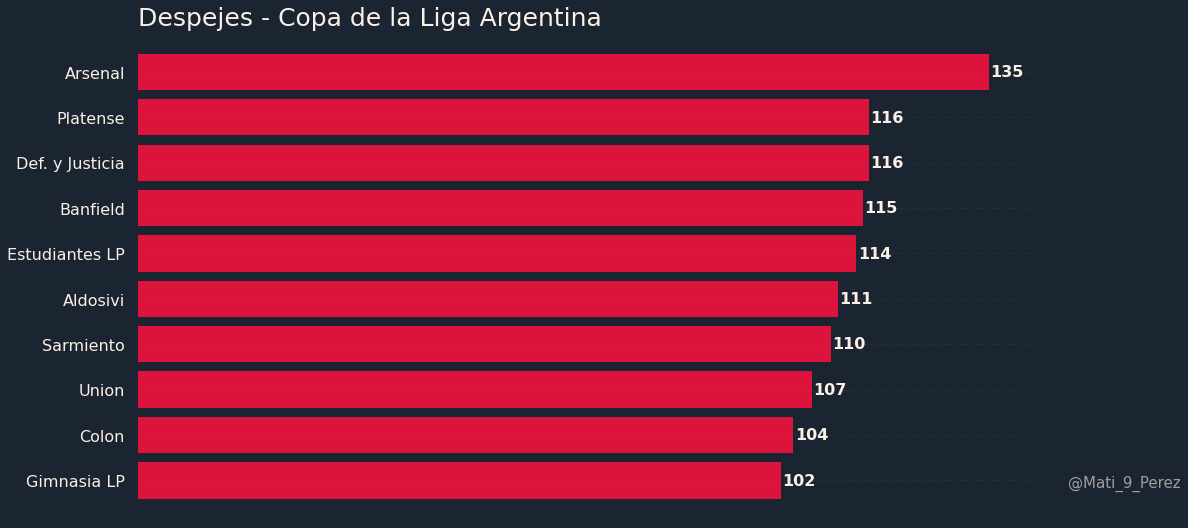

In [4]:
#Analisis de equipos TODAS LAS METRICAS
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as image
print(GLOBAL.columns)
listas=['Posesión perdida']
lista=['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al Palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases', 'Pases totales', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes']
for a in lista: 
    #if a=='Pases acierte'or a=='Pases largos' or a=='Centros' or a=='Regates':
        #print('hola')
    #else:
        parametro=a
        equipo=GLOBAL.groupby(['equipo']).sum().sort_values(by=[parametro],ascending= False).head(10).index
        dato=GLOBAL.groupby(['equipo']).sum().sort_values(by=[parametro],ascending= False)[parametro].head(10)
        abscisa=equipo
        
        if a=='Posesión de balón':
            cantidad = (GLOBAL.groupby(['equipo']).sum()/GLOBAL.groupby(['equipo']).count()).sort_values(by=['Posesión de balón'],ascending= False)['Posesión de balón'].head(10)
        else:
            cantidad = GLOBAL.groupby(['equipo']).sum().sort_values(by=[parametro],ascending= False)[parametro].head(10)
        #imput=input()
        #beto=imput+".png"
        
        def scale(im, nR, nC):
            """
            parameters
            im :image
            nR:row size
            nC:column size 
            Return: scaled image 
            """
            number_rows = len(im)     # source number of rows 
            number_columns = len(im[0])  # source number of columns 
            return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  
                         for c in range(nC)] for r in range(nR)]
        def watermark(ax,x0,y0):
            """
            adds image logo and positions it on the plot
            ax: figure object 
            x0: adds x 
            y0: adds y 
            """
            img = plt.imread('Copita.png')
            #scale Image
            img =scale(img, 800, 800)


            print('transData(0,0) = {}'.format(ax.transData.transform((0,0))))
            ax.figure.figimage(img, x0,y0, alpha=.65, zorder=1,origin="upper")

        #name = BIGDATA.sort_values(by=['Pases acertados'],ascending= False).head(12).index 
        # Figure Size
        fig, ax = plt.subplots(figsize =(16, 9))
        watermark(ax,4150,200)
        ax.barh(abscisa, cantidad, color="crimson")

        fig.patch.set_facecolor('xkcd:dark')
        ax.set_facecolor('xkcd:dark')
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)

        # Remove x, y Ticks
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')

        # Add padding between axes and labels
        #ax.xaxis.set_tick_params(pad = 5,colors='linen')
        ax.yaxis.set_tick_params(pad = 10,colors='linen',labelsize=16)
        ax.axes.get_xaxis().set_visible(False)

        # Add x, y gridlines
        ax.grid(b = True, color ='grey',
                linestyle ='-.', linewidth = 0.5,
                alpha = 0.2)

        # Show top values
        ax.invert_yaxis()

        # Add annotation to bars
        for i in ax.patches:
            plt.text(i.get_width()+0.2, i.get_y()+0.5,
                     str(round((i.get_width()), 2)),
                     fontsize = 16, fontweight ='bold',
                     color ='linen')
        #ax.tick_params(axis='x', colors='red')
        #ax.tick_params(axis='y', colors='red') 
        # Add Plot Title
        ax.set_title(parametro+' - Copa de la Liga Argentina',
                     loc ='left', color='linen',fontsize = 25)

        # Add Text watermark
        fig.text(1.03, 0.17, '@Mati_9_Perez', fontsize = 15,
                 color ='linen', ha ='right', va ='bottom',
                 alpha = 0.6)

        # Show Plot
        plt.show()
        #fig.savefig('myimage.svg', format='svg', dpi=1200)
        #plt.savefig('destination_path.eps', format='eps')
        fig.savefig(parametro+' Equipos'+' F5.png', dpi = 300,bbox_inches="tight")
        #fig.savefig('plot_name1200.png', dpi = 1200)

In [3]:
#COLOCADOR DE RESULTADO  RIVAL VISITANTE LOCAL Y CONDICION
Fixture=pd.read_excel('Pumpet.xlsx')
ContadorFixture=0
inicio=0
BIGDATA['Resultado']=""
BIGDATA['Rival']=''
BIGDATA['Condicion']=''
BIGDATA['Local']=''
BIGDATA['Visitante']=''
for i in range(0,len(BIGDATA.index)):
    if BIGDATA['Equipo'].iloc[i]==Fixture['Local'][ContadorFixture]:
        BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
        BIGDATA['Condicion'][i]='Home'
        BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
        BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
    elif BIGDATA['Equipo'].iloc[i]==Fixture['Visitante'][ContadorFixture]:
        BIGDATA['Rival'][i]=Fixture['Local'][ContadorFixture]
        BIGDATA['Condicion'][i]='Away'
        BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
        BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
    else:
        for a in range(inicio,i):
            BIGDATA['Resultado'][a]=Fixture['Resultado'][ContadorFixture]      
        inicio=i
        ContadorFixture=ContadorFixture+1
        if BIGDATA['Equipo'].iloc[i]==Fixture['Local'][ContadorFixture]:
            BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
            BIGDATA['Condicion'][i]='Home'
            BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
            BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
        else:
            BIGDATA['Rival'][i]=Fixture['Local'][ContadorFixture]
            BIGDATA['Condicion'][i]='Away'
            BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
            BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
for a in range(inicio,i+1):
    BIGDATA['Resultado'][a]=BIGDATA['Resultado'][a]=Fixture['Resultado'][ContadorFixture]   
BIGDATA

<ipython-input-3-3f5ae7a11d77>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
<ipython-input-3-3f5ae7a11d77>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BIGDATA['Condicion'][i]='Home'
<ipython-input-3-3f5ae7a11d77>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
<ipython-input-3-3f5ae7a11d77>:15: SettingWithCopyWarning

KeyError: 56

In [19]:
BIGDATA.groupby('Partido').sum().head(50).describe()
#BIGDATA.head(50)

Goles  Asistencias   Entradas  Goles y Asistencias  \
count  42.000000    42.000000  42.000000            42.000000   
mean    2.142857     1.380952  34.238095             3.523810   
std     1.424035     1.267846   8.706066             2.549396   
min     0.000000     0.000000  19.000000             0.000000   
25%     1.000000     0.250000  29.000000             2.000000   
50%     2.000000     1.000000  35.000000             3.500000   
75%     3.000000     2.000000  39.750000             5.000000   
max     6.000000     6.000000  55.000000            12.000000   

       Pases acertados  Pases totales  Porc Efectividad pases  \
count        42.000000      42.000000               42.000000   
mean        553.476190     747.404762             2154.761905   
std          88.317398      82.073453              216.898516   
min         341.000000     565.000000             1675.000000   
25%         481.000000     700.250000             2052.750000   
50%         557.500000     747.000000             2136.500000   
75%         630.250000     799.500000             2322.500000   
max         740.000000     906.000000             2558.000000   

       Duelos efectuados  Duelos ganados  Duelos en el suelo efectuados  \
count          42.000000       42.000000                      42.000000   
mean          222.166667      111.119048                     154.428571   
std            26.123456       13.044394                      23.002802   
min           176.000000       88.000000                     116.000000   
25%           204.500000      103.000000                     139.000000   
50%           215.000000      107.500000                     150.500000   
75%           242.000000      121.000000                     165.500000   
max           286.000000      143.000000                     210.000000   

       Duelos en el suelo ganados  Duelos aéreos efectuados  \
count                   42.000000                 42.000000   
mean                    77.238095                 67.738095   
std                     11.518404                 20.105890   
min                     58.000000                 34.000000   
25%                     69.500000                 52.250000   
50%                     75.500000                 66.000000   
75%                     82.750000                 81.000000   
max                    105.000000                118.000000   

       Duelos aereos ganados  Minutos jugados  Tiros a puerta  Tiros fuera  \
count              42.000000        42.000000       42.000000    42.000000   
mean               33.880952      1978.071429        8.142857    11.071429   
std                10.044298        22.244093        3.182049     3.218793   
min                17.000000      1914.000000        3.000000     5.000000   
25%                26.250000      1980.000000        6.000000     9.250000   
50%                33.000000      1985.000000        8.000000    10.500000   
75%                40.500000      1990.000000       10.000000    13.000000   
max                59.000000      2001.000000       15.000000    20.000000   

       Disparos bloq ATA  Regates intentados  Regates completados   Despejes  \
count          42.000000           42.000000            42.000000  42.000000   
mean            5.857143           33.261905            17.214286  37.547619   
std             2.763626            9.349735             5.887298   7.483974   
min             0.000000           17.000000             7.000000  24.000000   
25%             4.000000           28.250000            13.000000  31.000000   
50%             6.000000           33.000000            16.000000  36.500000   
75%             7.000000           36.000000            21.000000  42.750000   
max            12.000000           60.000000            37.000000  54.000000   

       Disparos Bloq Def  Intercepciones  Entradas.1  Regateado       Toques  \
count          42.000000       42.000000   42.000000  42.000000    42.000000   
mean       